# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


PACE stages



*   [Plan](#scrollTo=psz51YkZVwtN&line=3&uniqifier=1)
*   [Analyze](#scrollTo=mA7Mz_SnI8km&line=4&uniqifier=1)
* [Construct](#scrollTo=Lca9c8XON8lc&line=2&uniqifier=1)
* [Execute](#scrollTo=401PgchTPr4E&line=2&uniqifier=1)

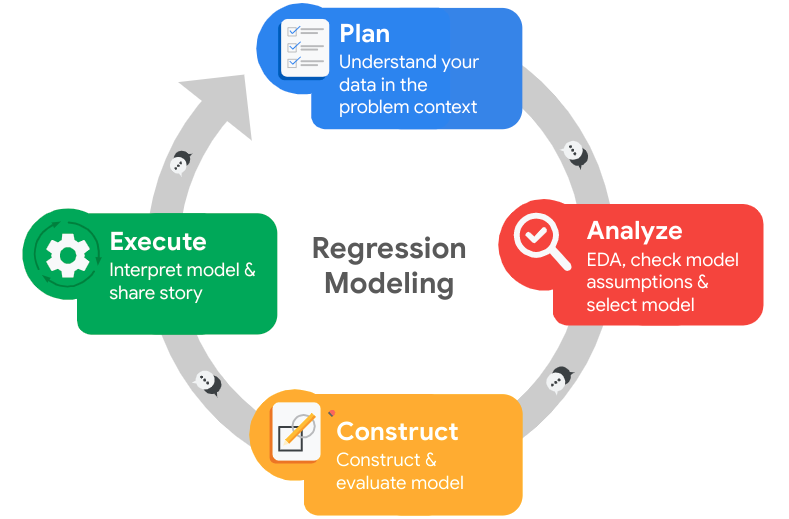



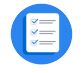

# Pace: Plan Stage

- Understand your data in the problem context
- Consider how your data will best address the business need
- Contextualize & understand the data and the problem


🗒
### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




The stakeholders are the management of Salifort Motors. The company wants to predict the likelihood of an employee leaving the company as it takes considerable amount of money to train an employee and hence an employee leaving is 'loss of profit'. 
Initially it could be found that there exists 3008 duplicates, which were removed and the variable 'time_spend_company has outliers.
Links to the resources : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.htm
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
https://xgboost.readthedocs.io/en/latest/python/python_api.html
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from scipy import stats as st
import statsmodels as stm
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from xgboost import plot_importance


### YOUR CODE HERE ###



### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")
df0
df0.head()
# Display first few rows of the dataframe
### YOUR CODE HERE ###


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.shape

(14999, 10)

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
for col in df0.columns:
    print(col)

satisfaction_level
last_evaluation
number_project
average_montly_hours
time_spend_company
Work_accident
left
promotion_last_5years
Department
salary


In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.rename(columns = {'satisfaction_level' : 'sat_level','last_evaluation' : 'last_eval',
                   'number_project' : 'no_project','average_montly_hours' : 'avg_monthly_hrs',
                   'Work_accident' : 'work_accident', 'Department' : 'department'
                  }, inplace = True)

# Display all column names after the update
### YOUR CODE HERE ###
for col in df0.columns:
    print(col)

sat_level
last_eval
no_project
avg_monthly_hrs
time_spend_company
work_accident
left
promotion_last_5years
department
salary


### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()   #hence no null vals

sat_level                0
last_eval                0
no_project               0
avg_monthly_hrs          0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [9]:
#there are 3008 duplicate rows. Since the response of one employee is highly unlikely to
#be same as these many, we can remove the duplicates.
df1 = df0.drop_duplicates(keep = 'first')
df1.head()

,sat_level,last_eval,no_project,avg_monthly_hrs,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
df1.shape

(11991, 10)

### Check outliers

Check for outliers in the data.

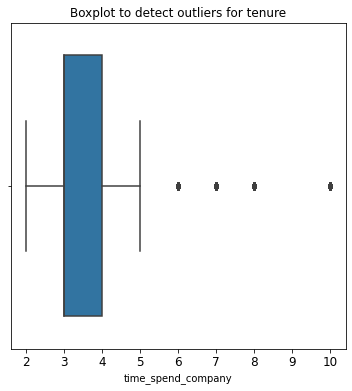

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['time_spend_company'])
plt.show()

In [11]:
#boxplot clearly shows the existence of outliers in tenure
#lets find the no. of rows of outliers in 'tenure'

In [12]:
#1st quartile
per25 = df1['time_spend_company'].quantile(0.25)
#3rd quartile
per75 = df1['time_spend_company'].quantile(0.75)
#define IQR
iqr = per75 - per25
#Lower limit for non outliers in 'tenure'
low_limit = per25 - 1.5 * iqr
#Upper limit for non outliers in 'tenure'
up_limit = per75 + 1.5 * iqr 
print("Lower Limit = ", low_limit)
print("Upper Limit = ", up_limit)
#define outler
outliers = df1[(df1['time_spend_company'] > up_limit) | (df1['time_spend_company'] < low_limit)]
print("The no. of rows containing outliers in tenure = ", len(outliers))

Lower Limit =  1.5
Upper Limit =  5.5
The no. of rows containing outliers in tenure =  824


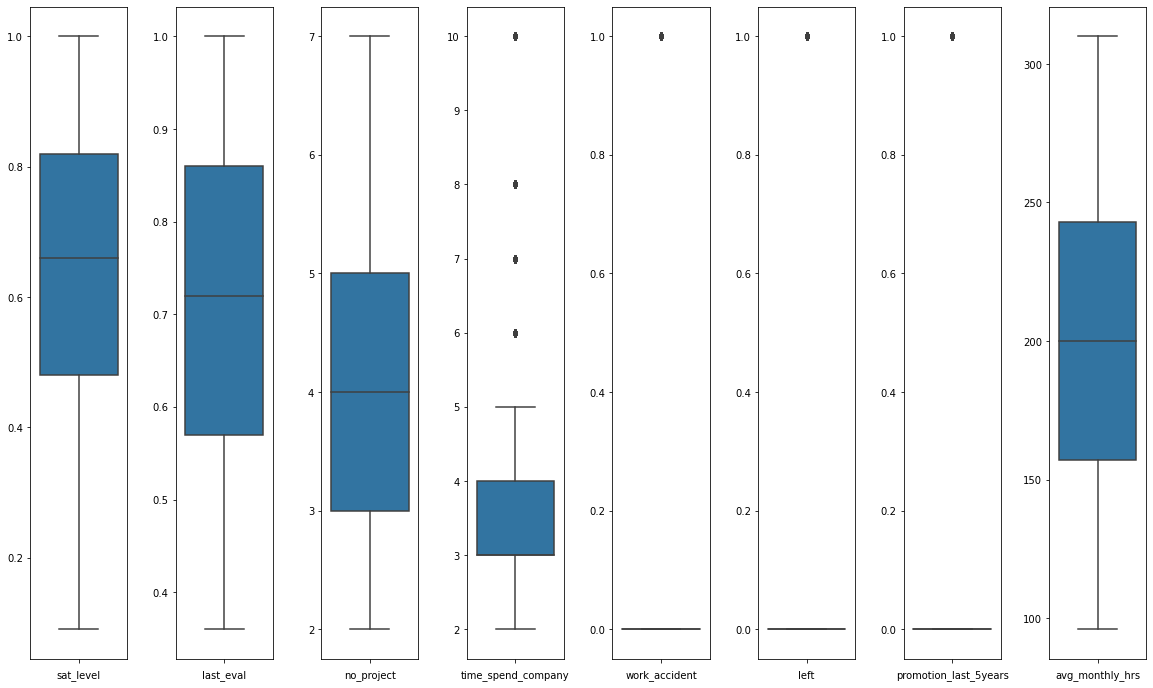

In [13]:
#Now lets see the complete outliers
fig, ax = plt.subplots(1, 8, figsize = (20, 12))
plt.subplots_adjust(wspace = 0.5)

sns.boxplot(data = df1['sat_level'], ax = ax[0])
ax[0].set_xlabel('sat_level')

sns.boxplot(data = df1['last_eval'], ax = ax[1])
ax[1].set_xlabel('last_eval')

sns.boxplot(data = df1['no_project'], ax = ax[2])
ax[2].set_xlabel('no_project')

sns.boxplot(data = df1['time_spend_company'], ax = ax[3])
ax[3].set_xlabel('time_spend_company')

sns.boxplot(data = df1['work_accident'], ax = ax[4])
ax[4].set_xlabel('work_accident')

sns.boxplot(data = df1['left'], ax = ax[5])
ax[5].set_xlabel('left') 

sns.boxplot(data = df1['promotion_last_5years'], ax = ax[6])
ax[6].set_xlabel('promotion_last_5years')

sns.boxplot(data = df1['avg_monthly_hrs'], ax = ax[7])
ax[7].set_xlabel('avg_monthly_hrs')

for subplot in ax:
    subplot.set_xticklabels([])

plt.show()

In [14]:
#thus only time_spend_company has outliers

In [14]:

### YOUR CODE HERE ###
df1.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sat_level,11991.0,NaN,NaN,NaN,0.629658,0.24107,0.09,0.48,0.66,0.82,1.0
last_eval,11991.0,NaN,NaN,NaN,0.716683,0.168343,0.36,0.57,0.72,0.86,1.0
no_project,11991.0,NaN,NaN,NaN,3.802852,1.163238,2.0,3.0,4.0,5.0,7.0
avg_monthly_hrs,11991.0,NaN,NaN,NaN,200.473522,48.727813,96.0,157.0,200.0,243.0,310.0
time_spend_company,11991.0,NaN,NaN,NaN,3.364857,1.33024,2.0,3.0,3.0,4.0,10.0
work_accident,11991.0,NaN,NaN,NaN,0.154282,0.361234,0.0,0.0,0.0,0.0,1.0
left,11991.0,NaN,NaN,NaN,0.166041,0.372133,0.0,0.0,0.0,0.0,1.0
promotion_last_5years,11991.0,NaN,NaN,NaN,0.016929,0.129012,0.0,0.0,0.0,0.0,1.0
department,11991,10,sales,3239,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,11991,3,low,5740,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#the distribution of time_spend_company is skewed to the right(mean=3.480773,med=3.0)
#while the distribution of sat_level(mean=0.620868,med=0.65) and no_project is slightly skewed to the left(mean=3.802778,med=4.0)

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

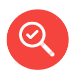
# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




The distribution of time_spend_company is skewed to the right(mean=3.480773,med=3.0) while the distribution of sat_level(mean=0.620868,med=0.65) and no_project is slightly skewed to the left(mean=3.802778,med=4.0). XGBClassifier() and some other analyses like PCA require the data to be standard scaled. Hence we use StandardScale()

## Step 2. Data Exploration (Continue EDA)

### Data visualizations

Now, start examining the variables that you're interested in, and create plots to visualize relationships between variables in the data.

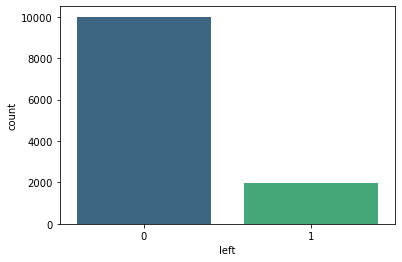

In [15]:
# Create a plot as needed
### YOUR CODE HERE ### Lets do countplot on target variable 'left' 0 = not left, 1 = left
sns.countplot(data = df1, x = 'left', palette = 'viridis')

In [16]:
df1['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

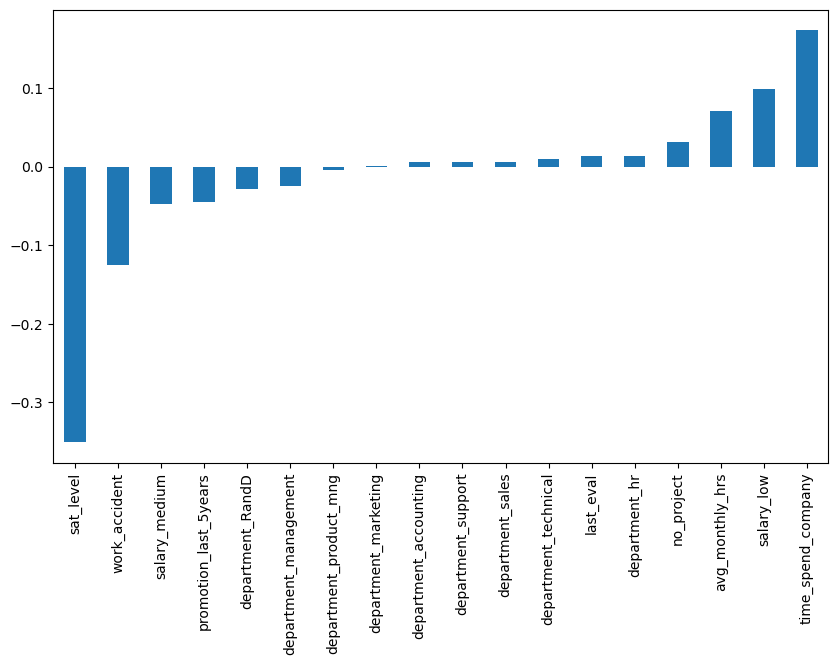

In [17]:
# Create a plot as needed
### YOUR CODE HERE ### Lets check the correlation of each variable with the target variable to check which ones influence the target variable 'left the most'
plt.figure(figsize = (10, 6), dpi = 100)
pd.get_dummies(df1, drop_first = True).corr()['left'].sort_values()[:-1].plot(kind = 'bar');


In [20]:
## clearly sat_level, work_accident have very high negative correlation while time_spend, 
##salary_low and avg_mothly_hrs have 
##high positive correlation with target variable left

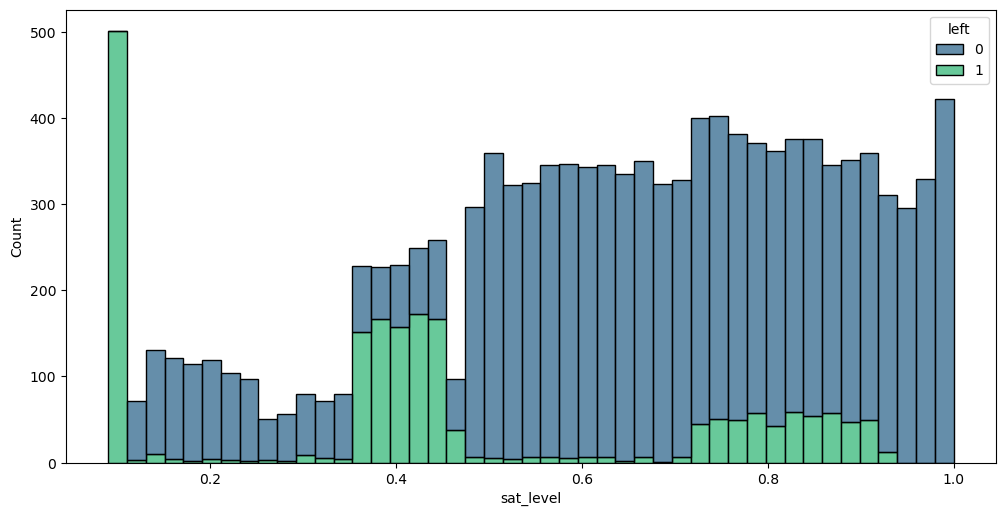

In [18]:
plt.figure(figsize = (12,6), dpi = 100)
sns.histplot(data = df1, x = 'sat_level', hue = 'left', bins = 45, multiple = 'stack', palette = 'viridis' )

In [ ]:
#As clearly seen, even with high sat_level, employees have left the company.
#also its odd that employees with low sat_level(0.1 - 0.3) have stayed

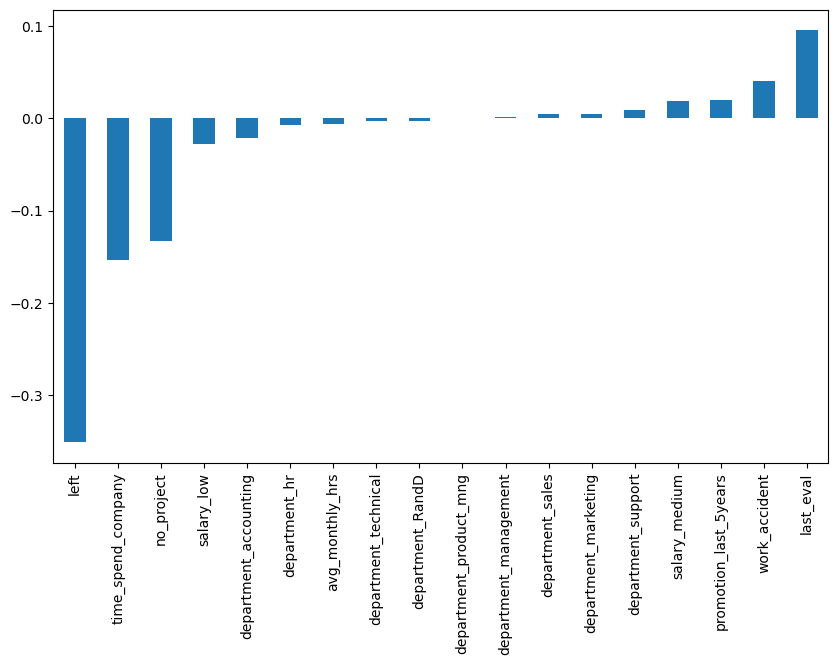

In [19]:
plt.figure(figsize = (10, 6), dpi = 100)
pd.get_dummies(df1, drop_first = True).corr()['sat_level'].sort_values()[:-1].plot(kind = 'bar');


In [ ]:
#thus sat_level has high negative correlation with 'time_spend_company' and 'no_project' and high positive correlation 
#with 'last_eval'
#this correlation doesnt mean that there exists considerable amount of multicollinearity.

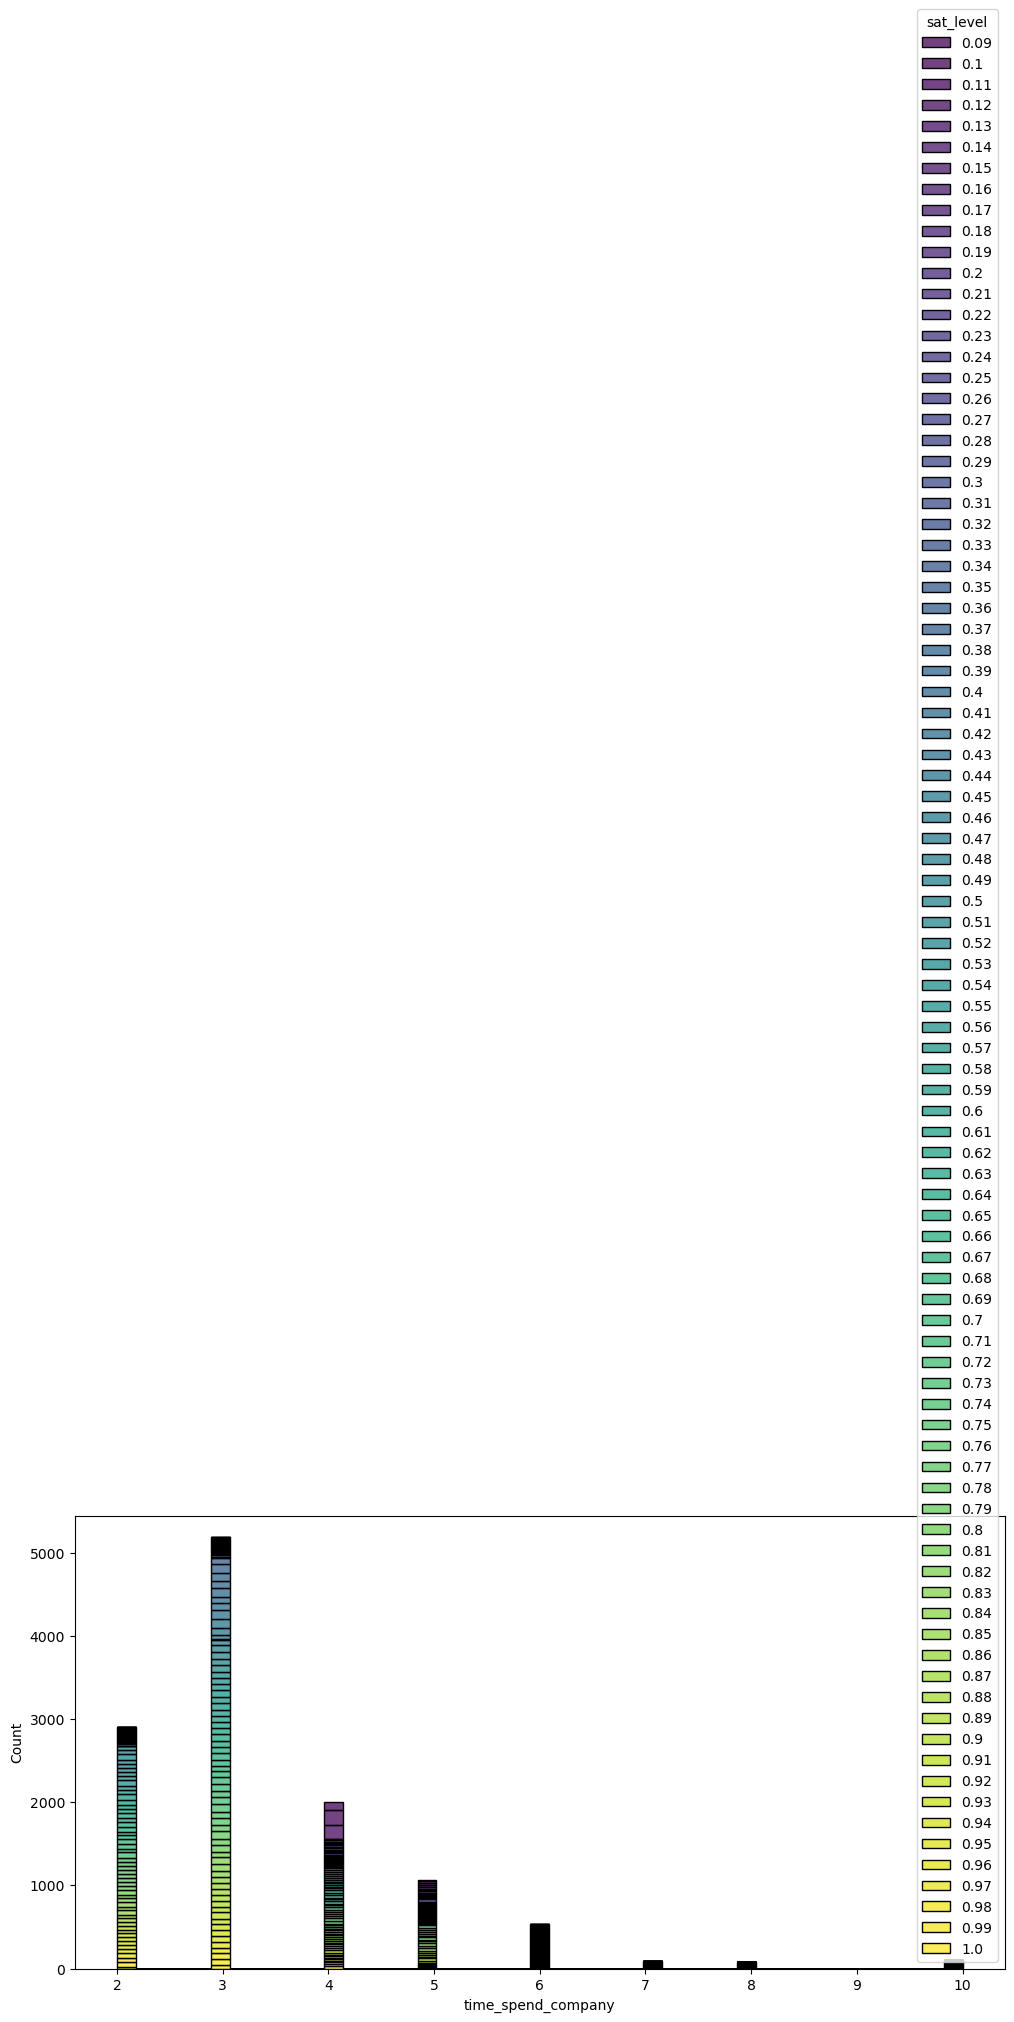

In [21]:
plt.figure(figsize = (12,6), dpi = 100)
sns.histplot(data = df1, x = 'time_spend_company', hue = 'sat_level', bins = 45, multiple = 'stack', palette = 'viridis' )

In [ ]:
#as clearly seen, a very small portion of employees are dissatisfied at (2,3) years and a very large number
#of employees are dissatisfied at(4,5,6) years

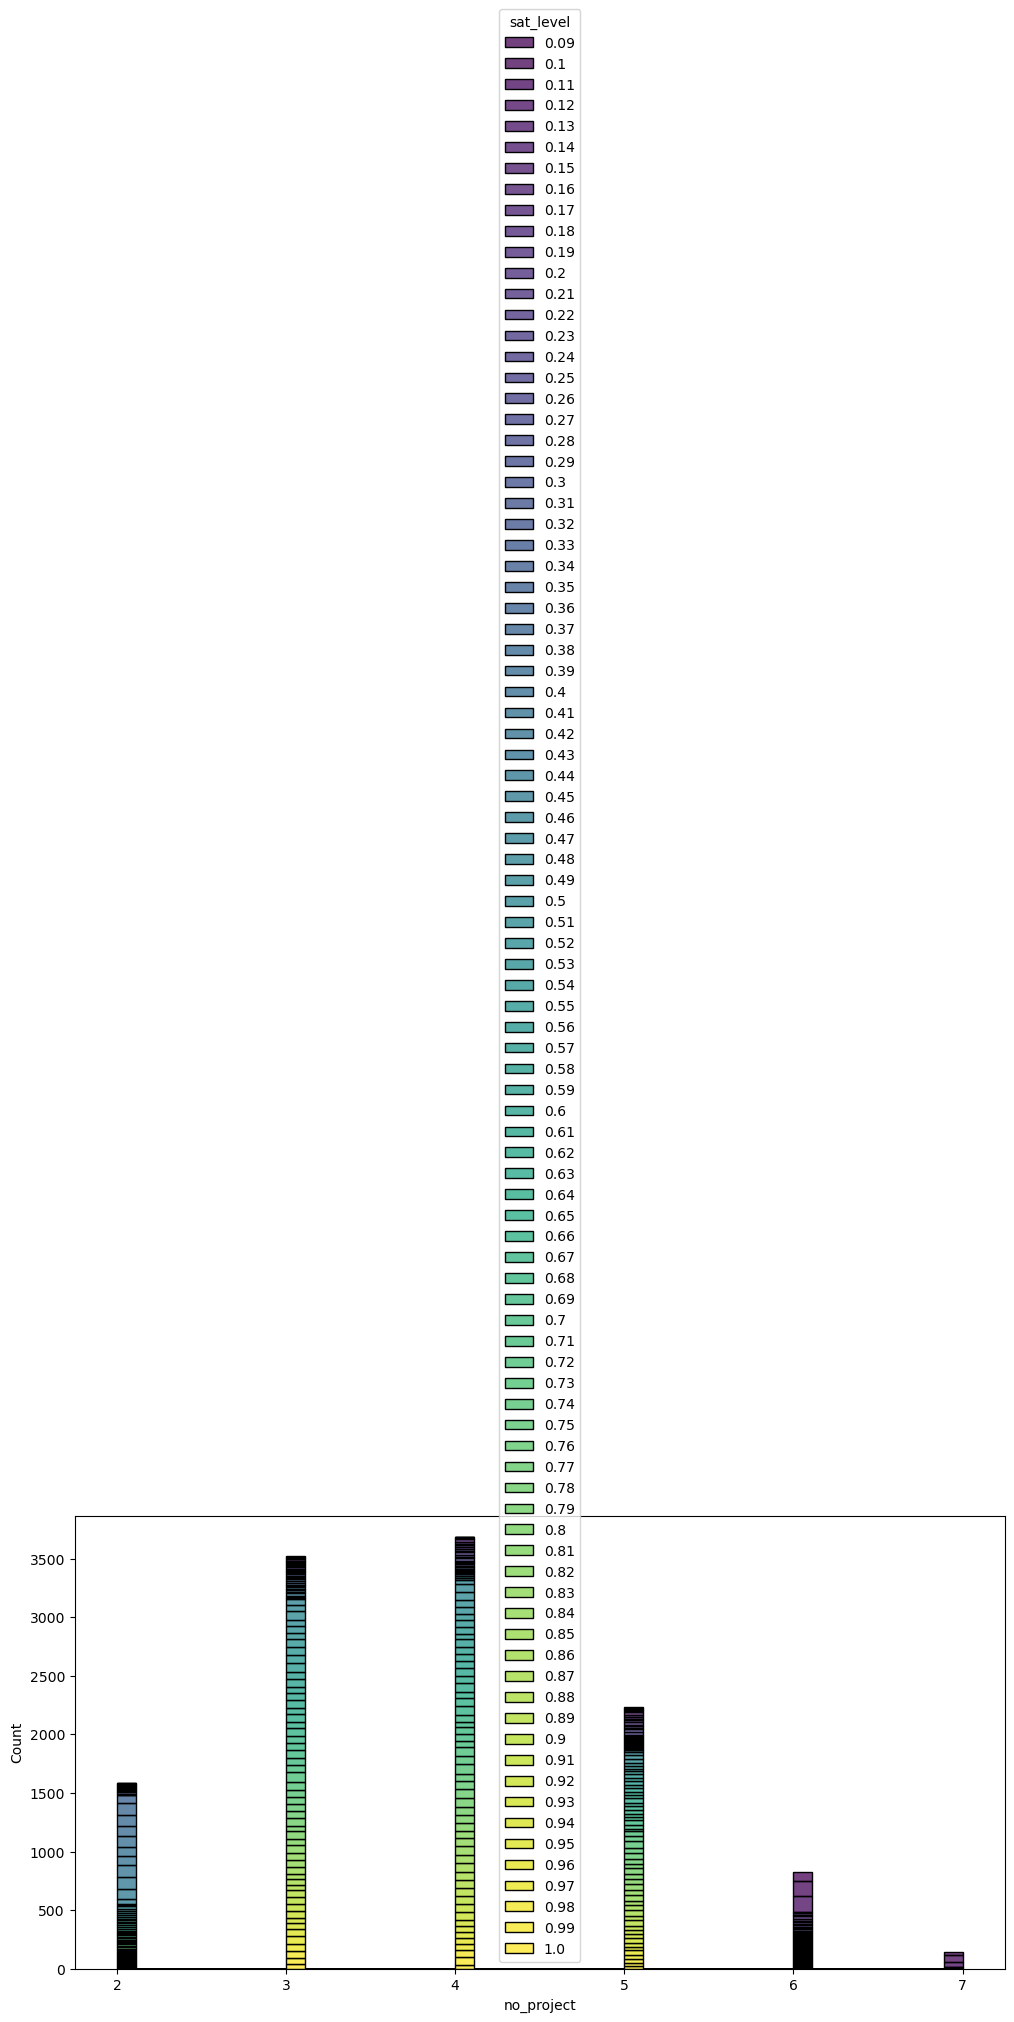

In [30]:
plt.figure(figsize = (12,6), dpi = 100)
sns.histplot(data = df1, x = 'no_project', hue = 'sat_level', bins = 45, multiple = 'stack', palette = 'viridis' )

In [ ]:
#as clearly seen, a very large number of employees are dissatisfied with 2 projects. While a very large number
#is satisfied with (3,4) projects . that is odd.

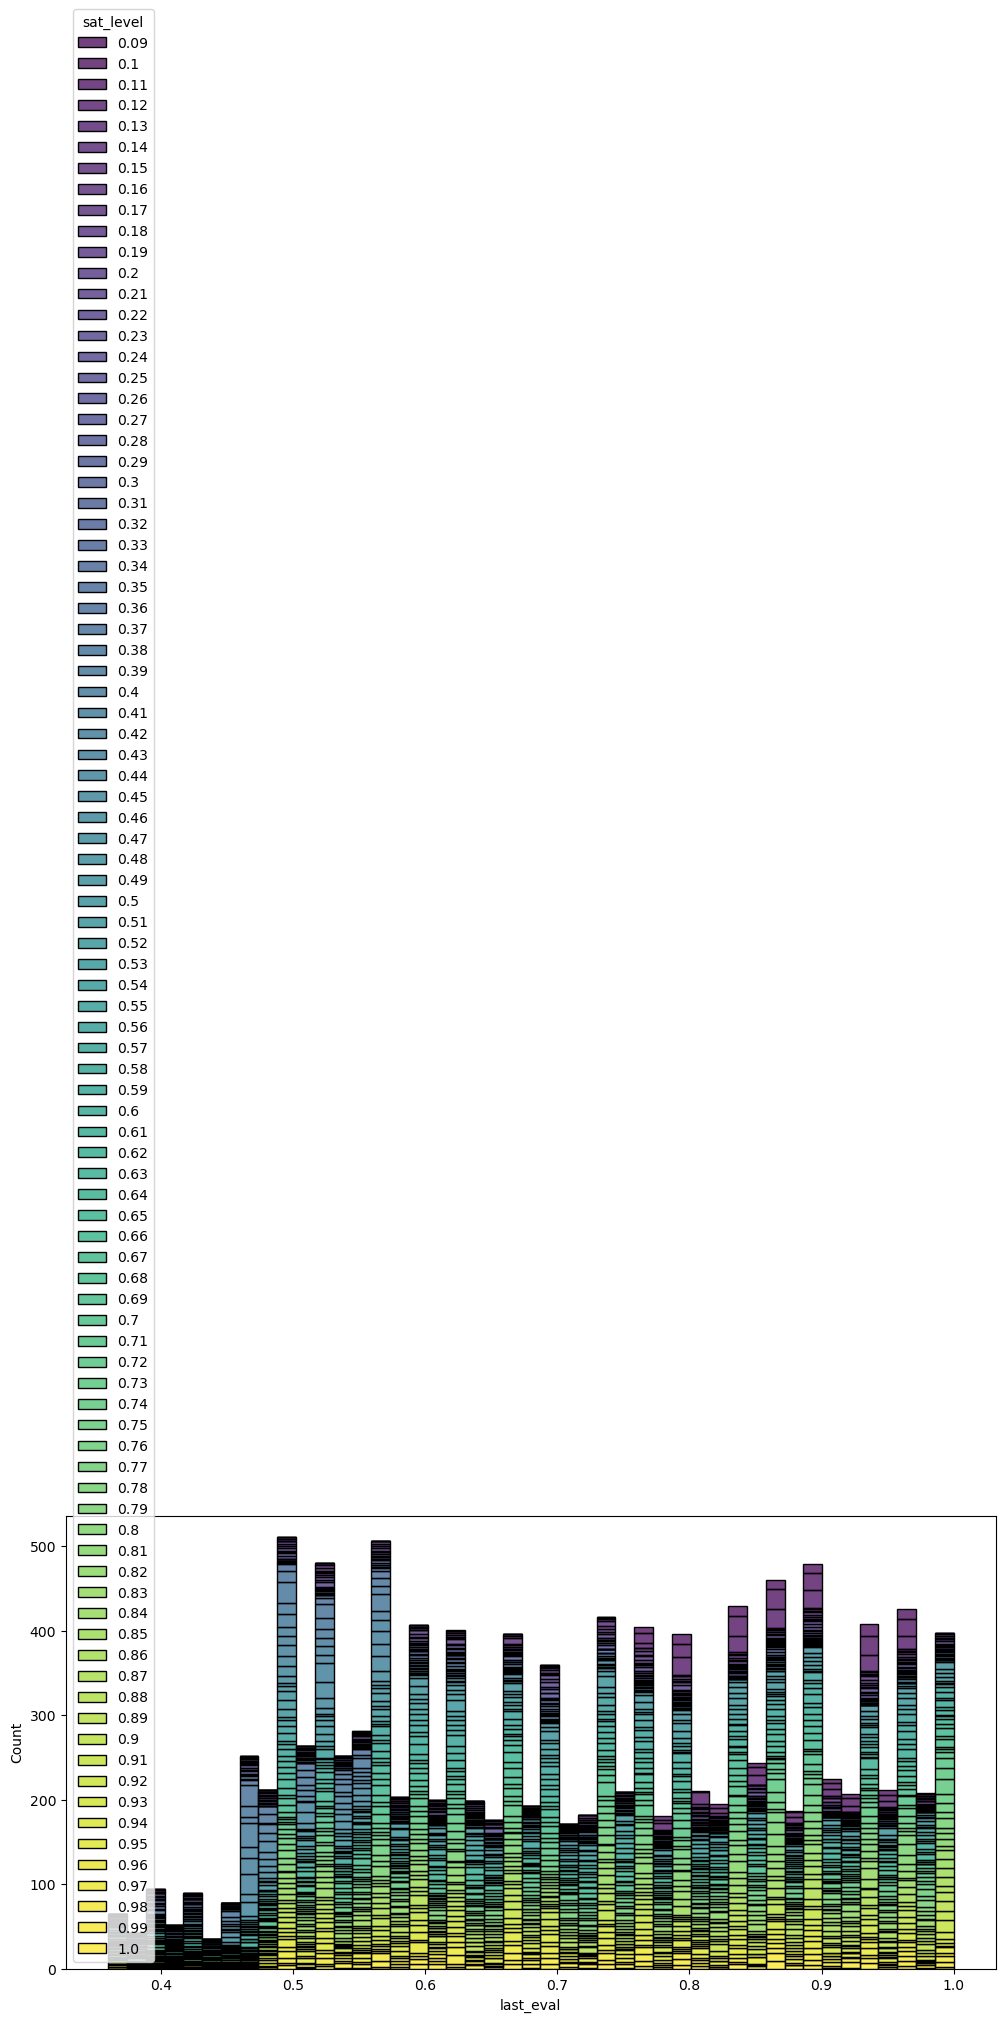

In [32]:
plt.figure(figsize = (12,6), dpi = 100)
sns.histplot(data = df1, x = 'last_eval', hue = 'sat_level', bins = 45, multiple = 'stack', palette = 'viridis' )

In [ ]:
#as clearly seen, employees with last_eval < 0.5 are dissatisfied. 
#also interestingly a small number of employees with low 'sat_level' and low 'last_eval' have stayed.

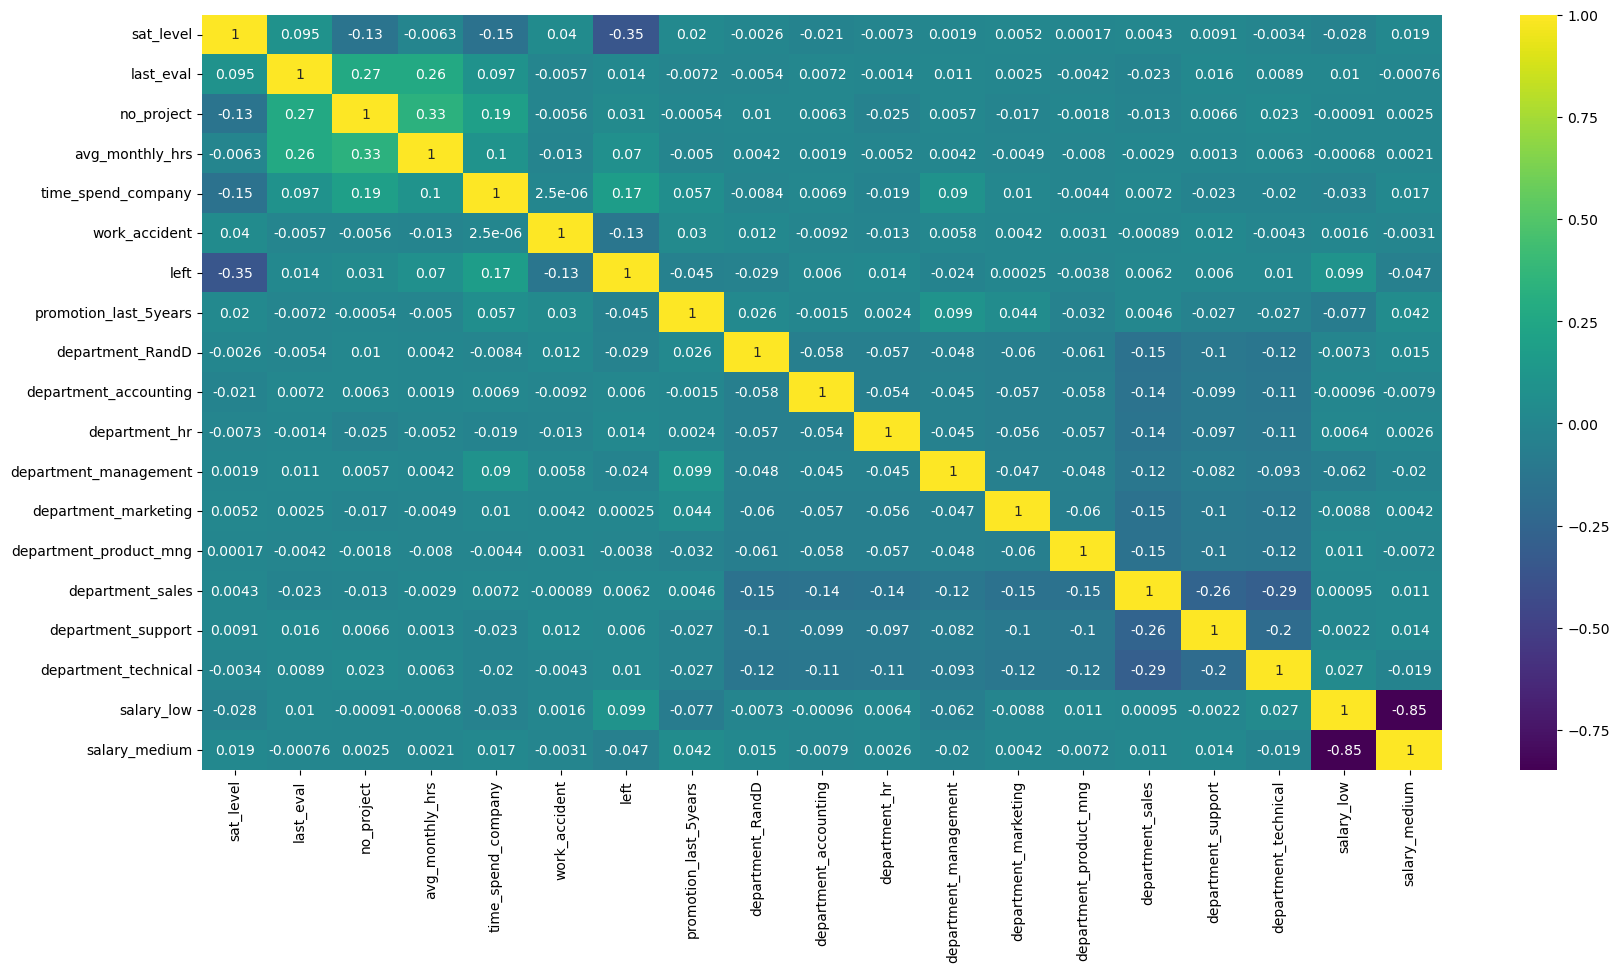

In [19]:
# Create a plot as needed
### YOUR CODE HERE ### lets create the heatmap of correlation
plt.figure(figsize = (20, 10), dpi = 100)
sns.heatmap(data = pd.get_dummies(df1, drop_first=True).corr(), cmap = 'viridis', annot = True
           )


In [22]:
#the heatmap clearly confirms the existence of positive correlation between 'sat_level' and 'avg_monthly_hrs'
#it also shows the negative correlation between employee left and sat_level

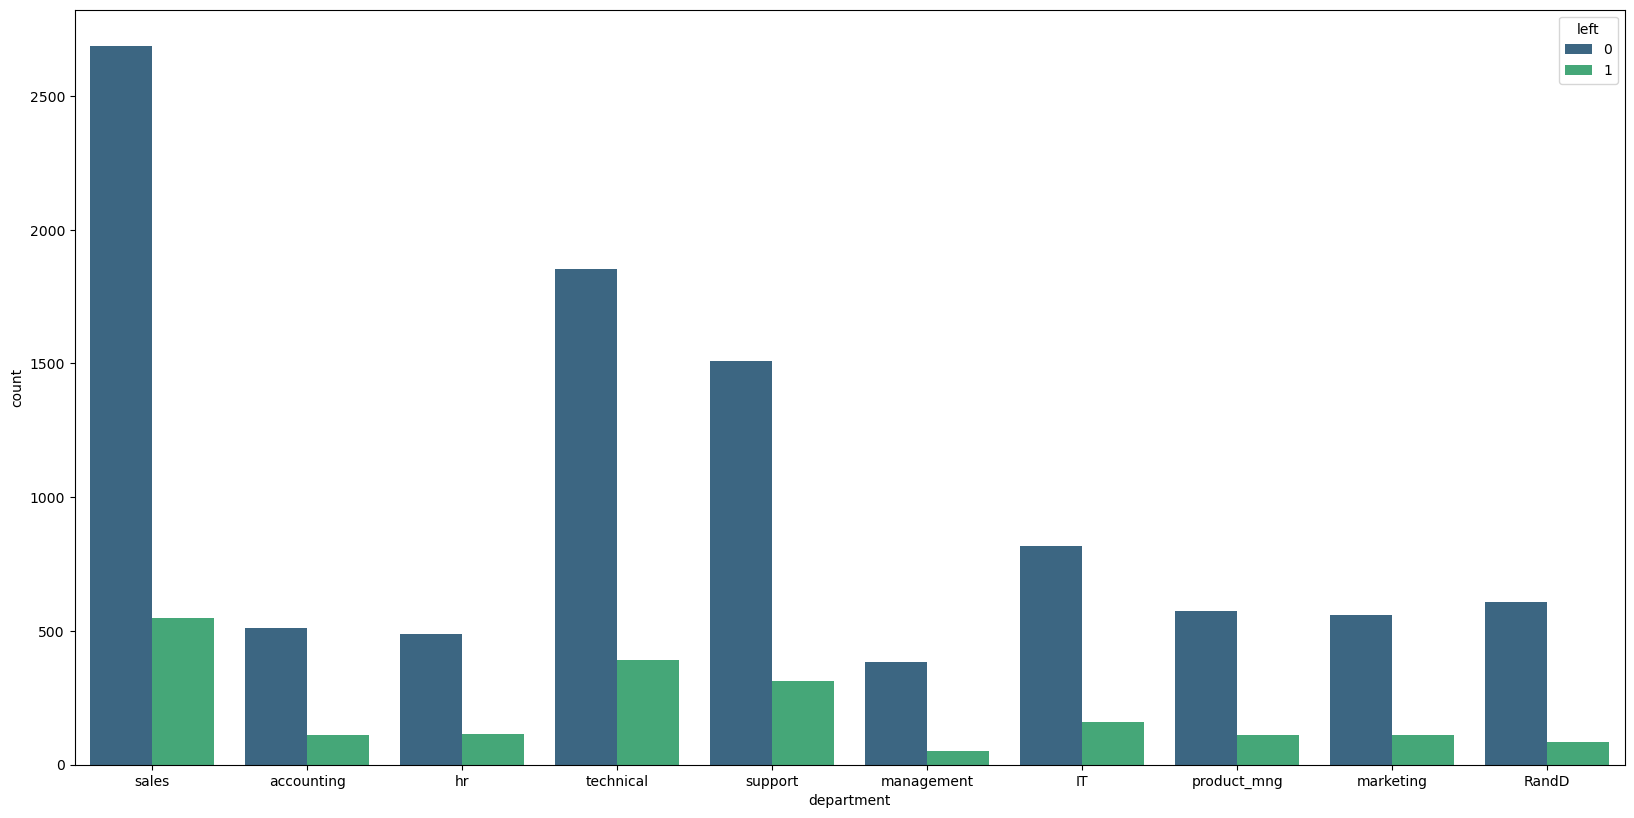

In [20]:
# Create a plot as needed
### YOUR CODE HERE ### Lets see the employee count per department w.r.t 'left'
plt.figure(figsize = (20, 10), dpi = 100)
sns.countplot(data = df1, x = 'department', hue = 'left', palette = 'viridis')

In [24]:
##sales, technical and supprt have the highest employee count and 'left' count

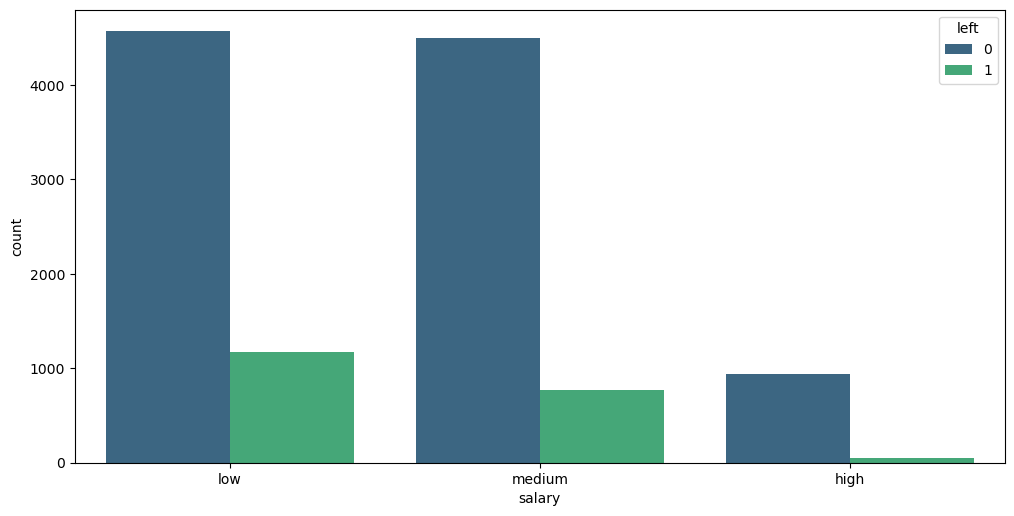

In [25]:
# Create a plot as needed
### YOUR CODE HERE ###
#as seen in previous plots salary_low has a positive correlatrion and lets check that .
plt.figure(figsize = (12, 6), dpi = 100)
sns.countplot(data = df1, x = 'salary', hue = 'left', palette = 'viridis')


In [26]:
## as clearly seen employee retention is very low in salary_low and
#salary_med category while employee retention is very high in salary_high category clearly 
#indicating the positive correlaation of salary

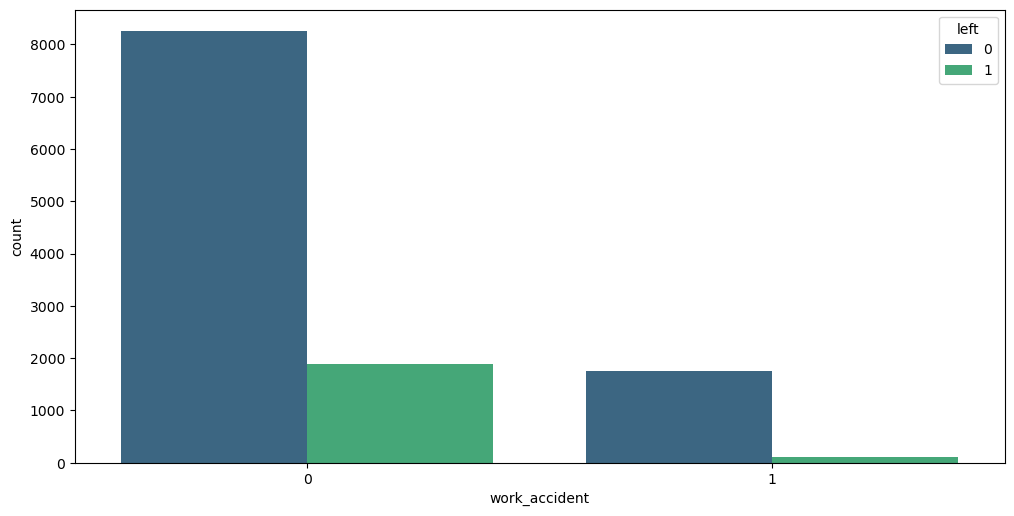

In [27]:
# Create a plot as needed
### YOUR CODE HERE ###lets check the negative corelation of work accident
plt.figure(figsize = (12, 6), dpi = 100)
sns.countplot(data = df1, x = 'work_accident', hue = 'left', palette = 'viridis')


In [25]:
df1['work_accident'].value_counts()

0    10141
1     1850
Name: work_accident, dtype: int64

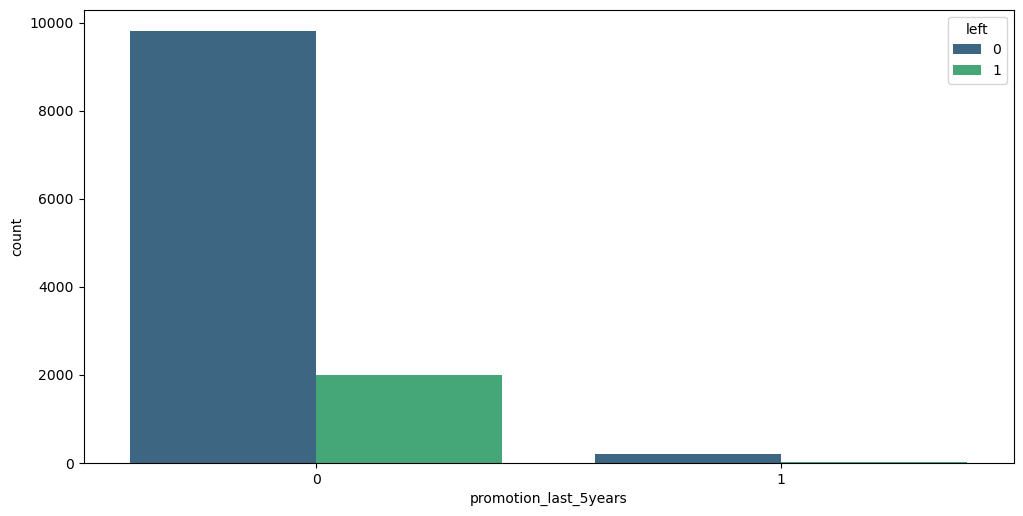

In [29]:
#lets see employee count w.r.t promotion variable
plt.figure(figsize = (12,6), dpi = 100)
sns.countplot(data = df1, x = 'promotion_last_5years', hue = 'left', palette = 'viridis')

In [30]:
# as clearly seen, those who were promoted(though in 100's)
#have not left while 20 - 30% of people not promoted left the company

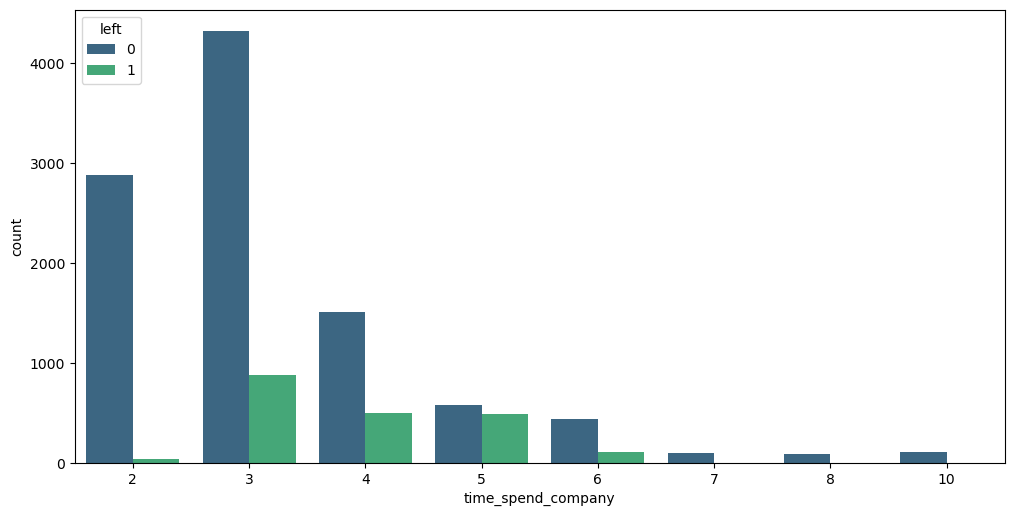

In [31]:
plt.figure(figsize = (12,6), dpi = 100)
sns.countplot(data = df1, x = 'time_spend_company', hue = 'left', palette = 'viridis')

In [ ]:
#as clearly seen almost all employees leave as the time_spend_company is in the range of (3 yrs to 6 yrs).
#also it can be seen that no employees with 'time_spend_company' > 6 has left the company.

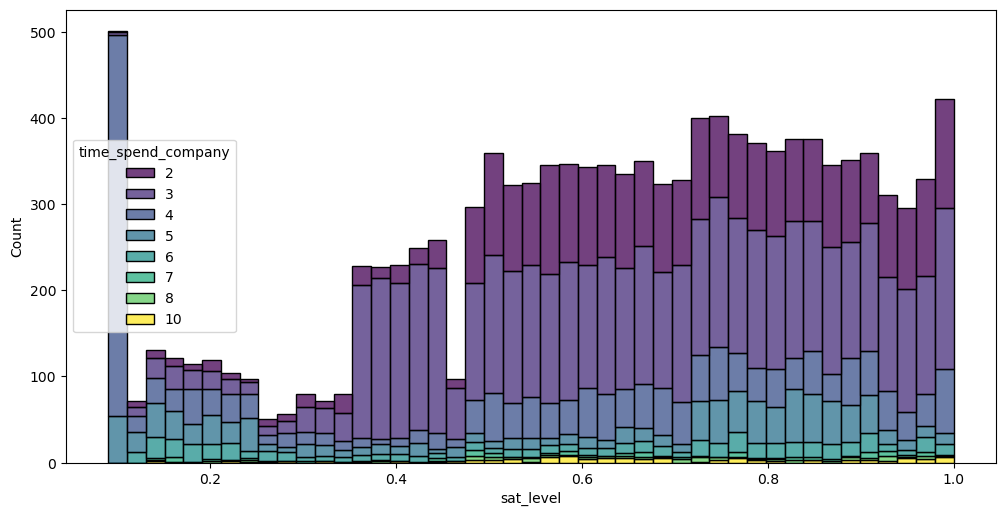

In [24]:
plt.figure(figsize = (12,6), dpi = 100)
sns.histplot(data = df1, x = 'sat_level', hue = 'time_spend_company', bins = 45, multiple = 'stack', palette = 'viridis' )

In [32]:
#as clearly seen, sat_level decreases with increase in 'time_spend_company'

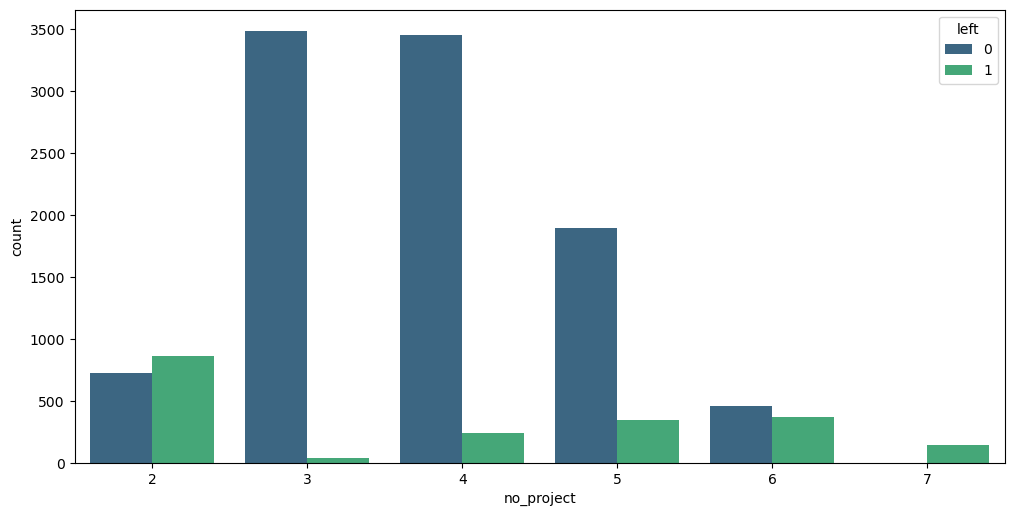

In [33]:
plt.figure(figsize = (12,6), dpi = 100)
sns.countplot(data = df1, x = 'no_project', hue = 'left', palette = 'viridis')

In [34]:
#as clearly seen employees with 'no_project' = (3,4) has high retention rate and employees with 'no_project' = (6,2,5)
# has least employee retention
#also all employees with no_project > 6 have left the company

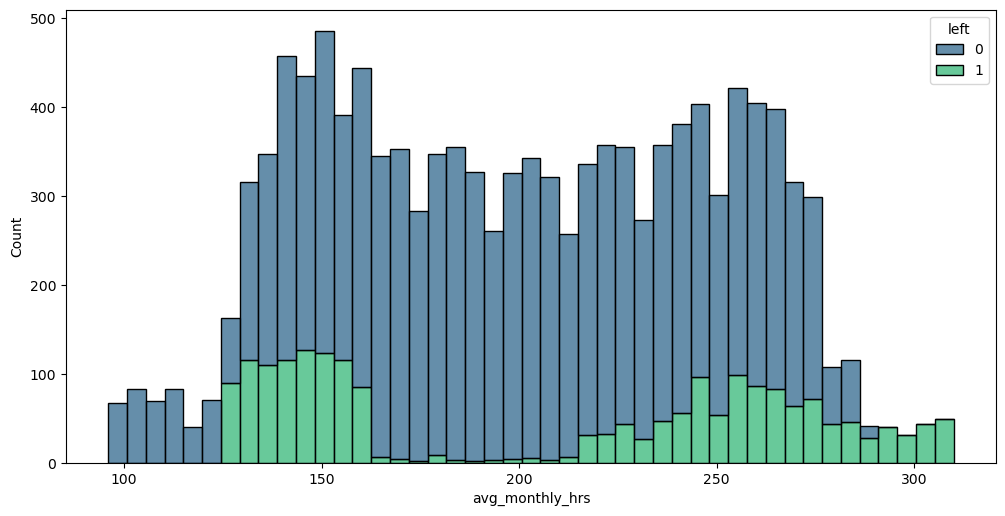

In [35]:
#lets plot the distribution of avg_monthly_hours(histogram)
plt.figure(figsize = (12,6), dpi = 100)
sns.histplot(data = df1, x = 'avg_monthly_hrs', hue = 'left', bins = 45, multiple = 'stack', palette = 'viridis' )

In [ ]:
# as clearly seen, employees working at an avg monthly hrs of (120 - 150)
#have left and those working at an avg of 215 to 325 have left the company.

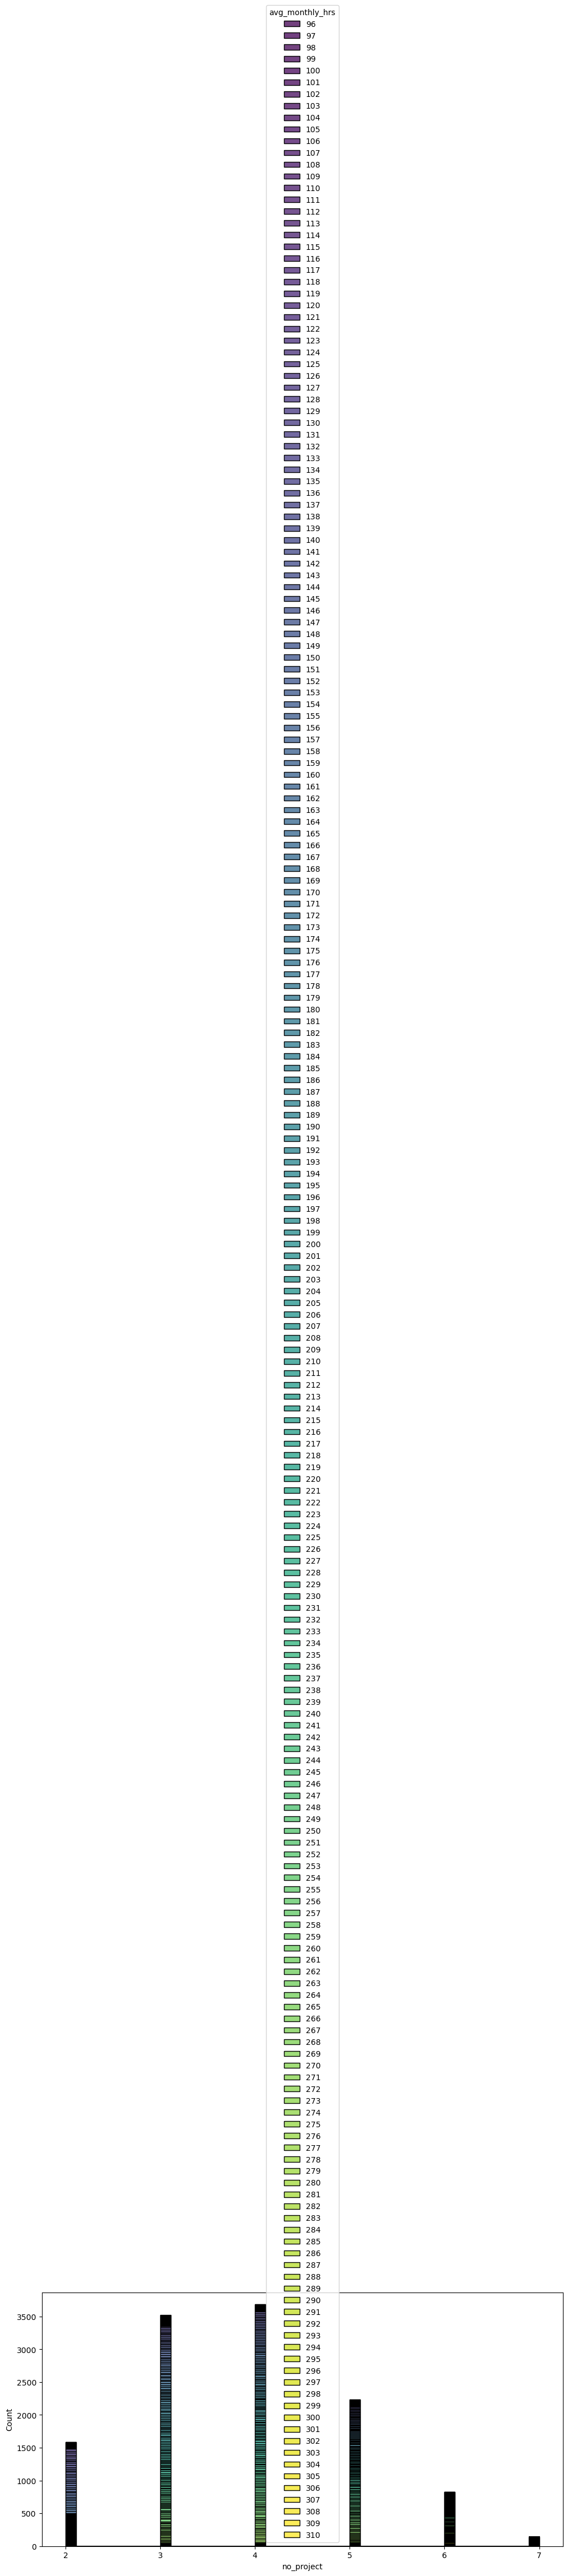

In [23]:
plt.figure(figsize = (12,6), dpi = 100)
sns.histplot(data = df1, x = 'no_project', hue = 'avg_monthly_hrs', bins = 45, multiple = 'stack', palette = 'viridis' )

In [36]:
#as clearly seen the avg_monthly_hrs of employees working in 2 projects is greater than avg_monthly_hrs of employees
#working in 3,4 and 5 projects. 

In [37]:
# Display counts for each department
df1["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

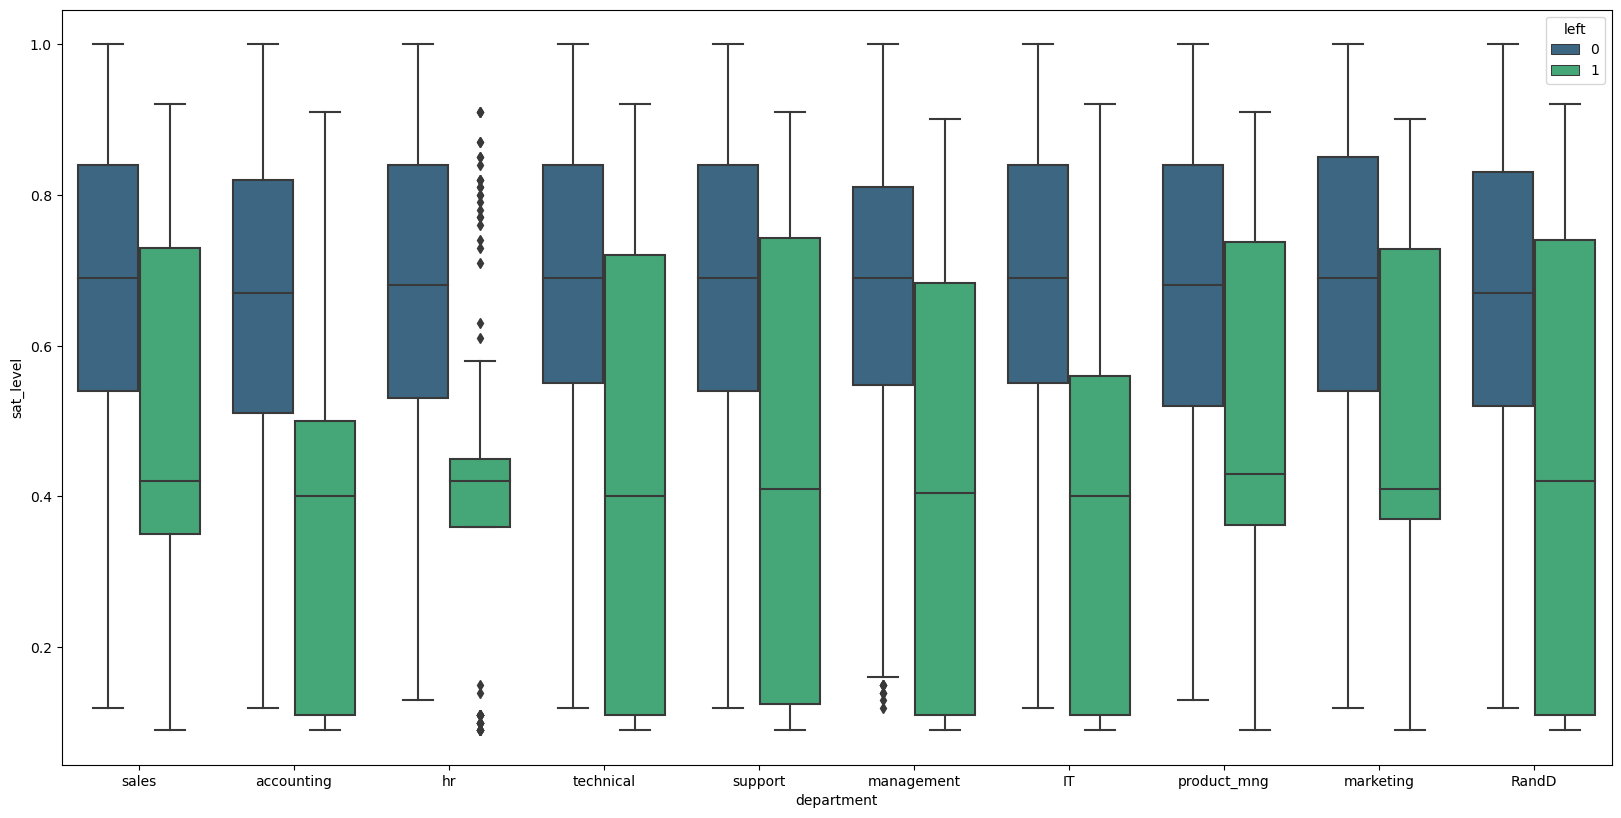

In [38]:
# Create a plot as needed
### YOUR CODE HERE ###lets create a boxplot of satisfaction levels of each department w.r.t left
plt.figure(figsize = (20,10), dpi = 100)
sns.boxplot(data = df1, x = 'department', y = 'sat_level', hue = 'left', palette = 'viridis')


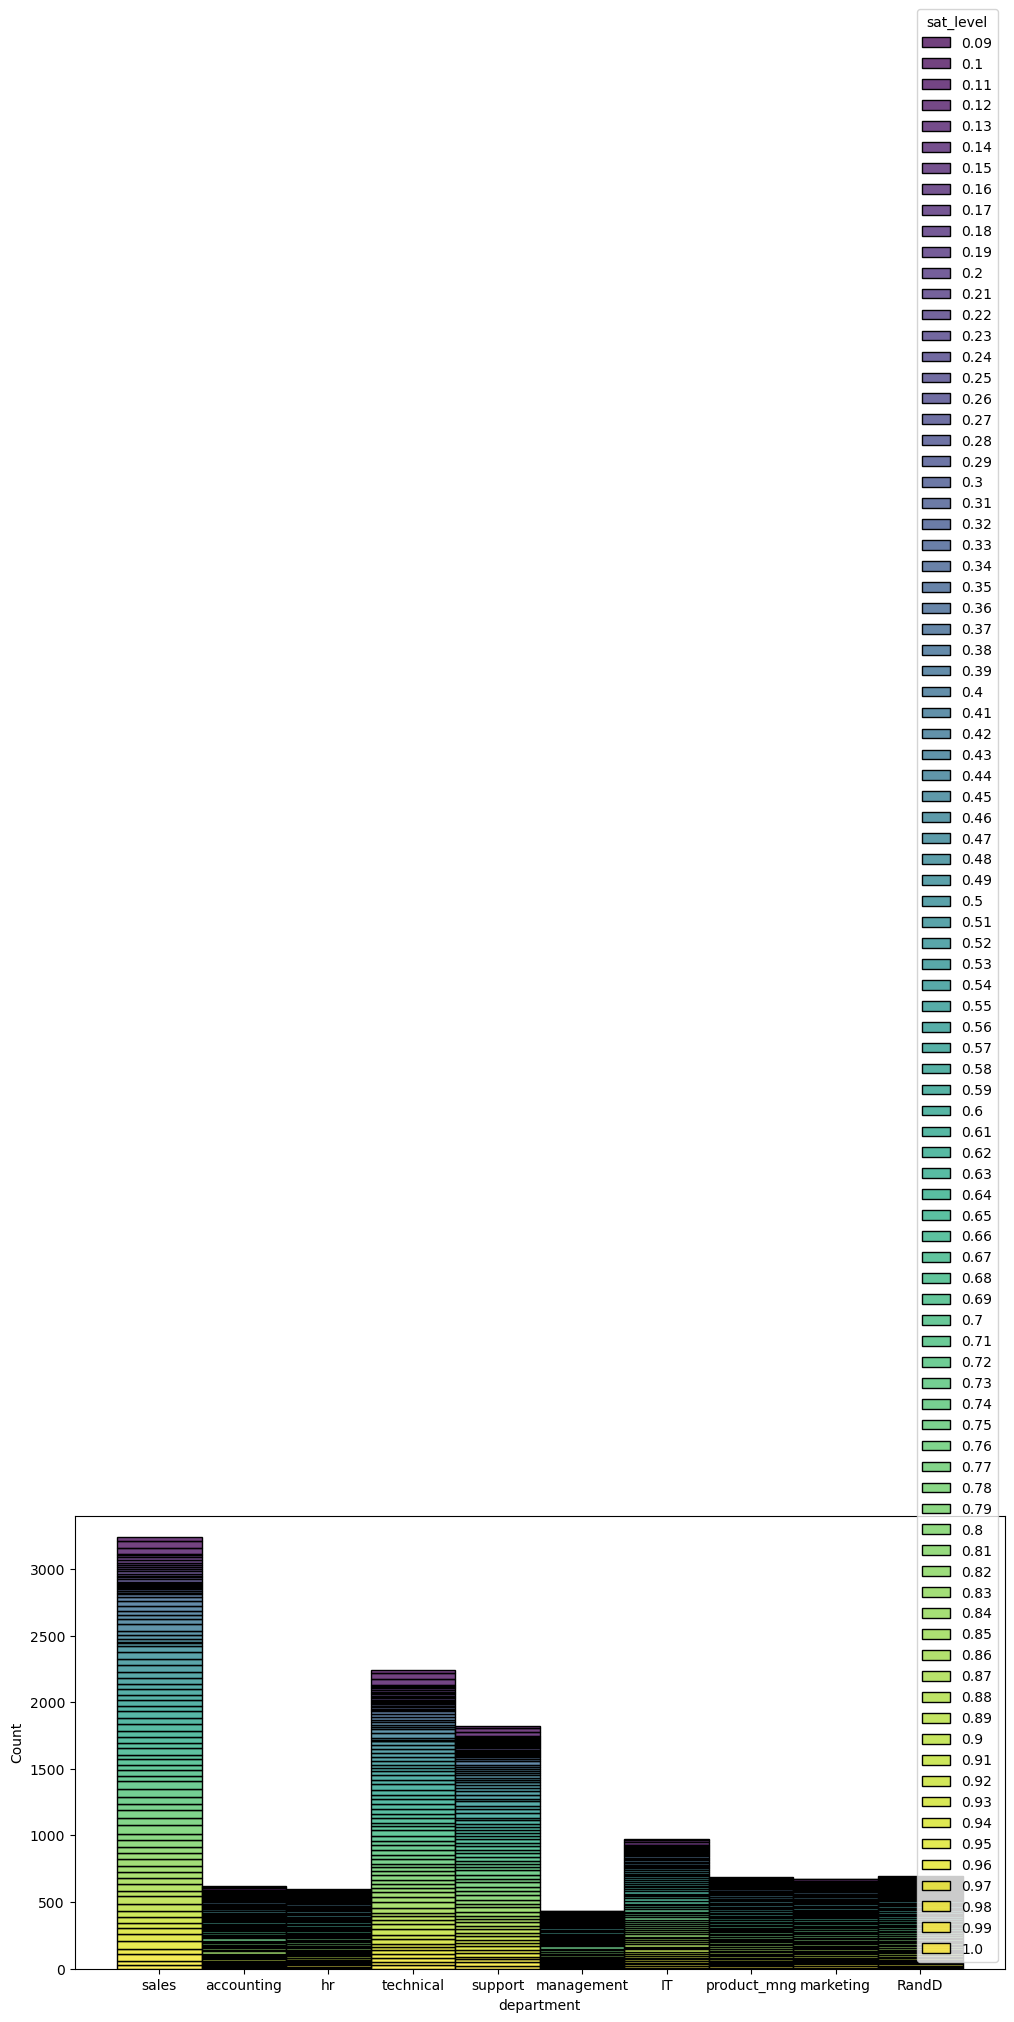

In [28]:
plt.figure(figsize = (12,6), dpi = 100)
sns.histplot(data = df1, x = 'department', hue = 'sat_level', bins = 45, multiple = 'stack', palette = 'viridis' )

In [ ]:
#As clearly seen only sales, technical and support have good sat_level. 

In [39]:

#hr and management departments have outliers.
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['sat_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


In [40]:
# as clearly seen, mean and median of sat_levels of thos who left are lower than those who remain.\
#also it can be seen that the mean of those who remained is slightly lower than 
#median and hence it is skewed to the left 

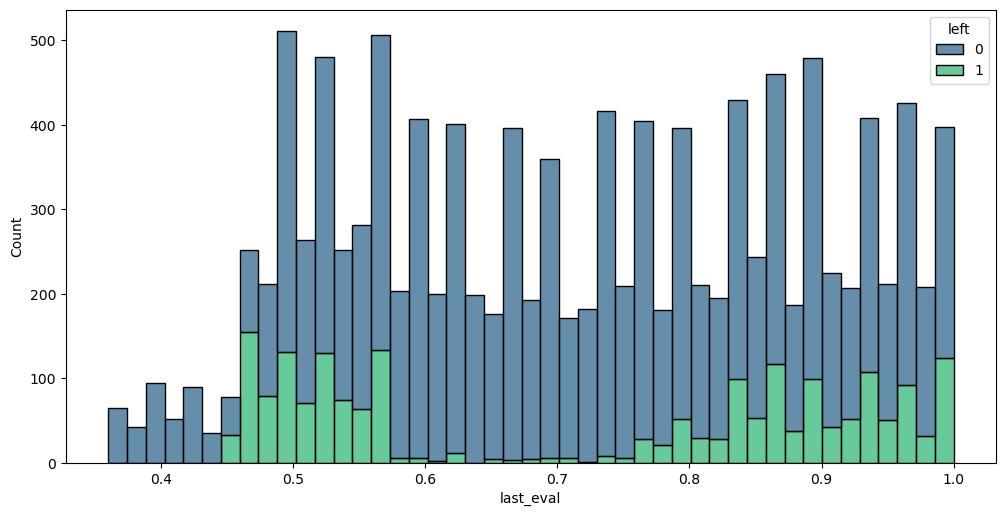

In [35]:
#
plt.figure(figsize = (12,6), dpi = 100)
sns.histplot(data = df1, x = 'last_eval', hue = 'left', bins = 45, multiple = 'stack', palette = 'viridis' )

In [ ]:
#as clearly seen, employees with last_eval = (0.45- 0.55) and (0.76 - 1.0) have left.

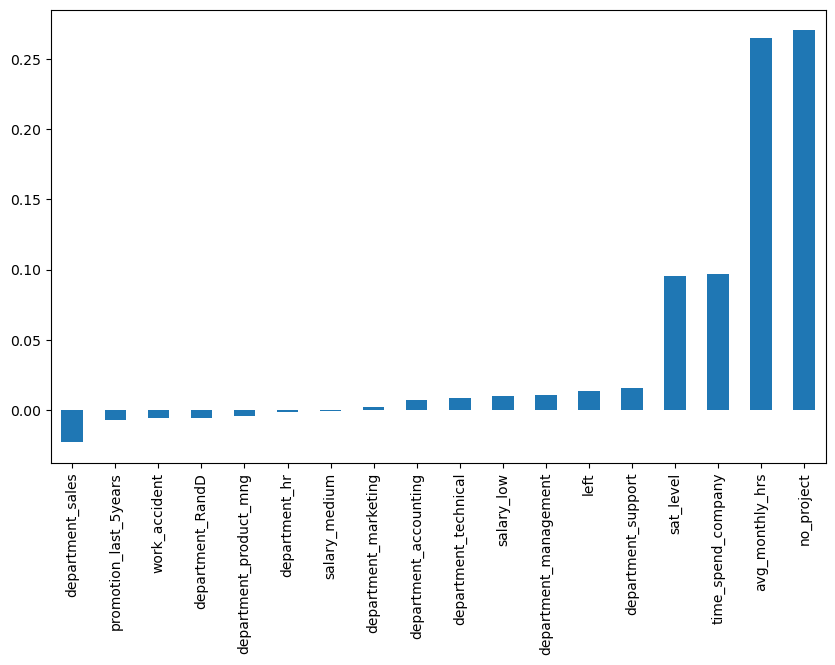

In [34]:
plt.figure(figsize = (10, 6), dpi = 100)
pd.get_dummies(df1, drop_first = True).corr()['last_eval'].sort_values()[:-1].plot(kind = 'bar');


In [ ]:
#As clearly seen 'last_eval' has high positive correlation with 'no_project', 'avg_monthly_hrs' and
#medium positive correlation with 'time_spend_company' and 'sat_level'

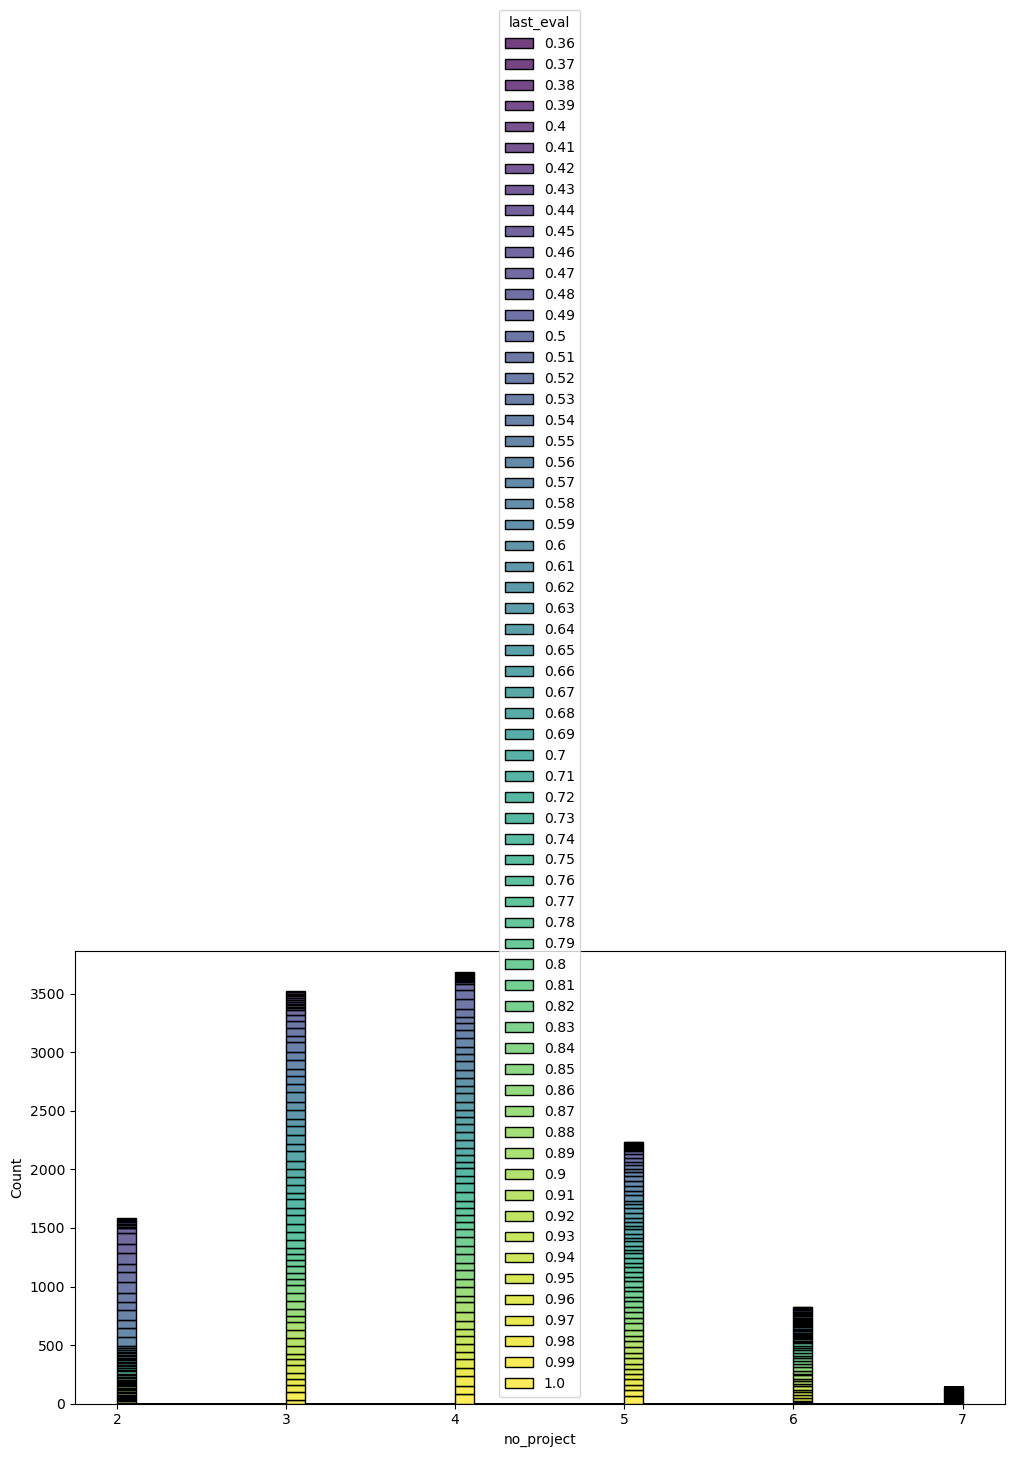

In [36]:
plt.figure(figsize = (12,6), dpi = 100)
sns.histplot(data = df1, x = 'no_project', hue = 'last_eval', bins = 45, multiple = 'stack', palette = 'viridis' )

In [ ]:
#as clearly seen all employees with 2 projects have scored poorly in last_eval as did most employees with 6 projects

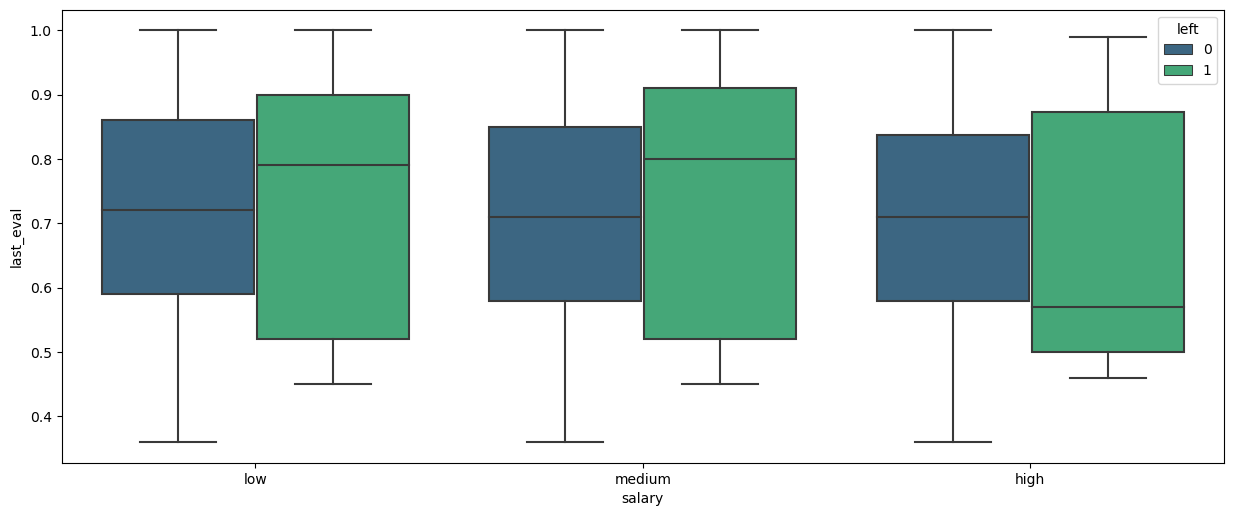

In [43]:


#now lets create a boxplot with salary categories(low,med,hi) and last_eval w.r.t. 'left'
plt.figure(figsize = (15,6), dpi = 100)
sns.boxplot(data = df1, x = 'salary', y = 'last_eval', hue = 'left', palette = 'viridis')

In [ ]:
#as clearly seen, employees with last_eval with median 0.8 of low and med_salary categories have left.
#also employees with high salary and last_eval with median 0.55 have left the company.

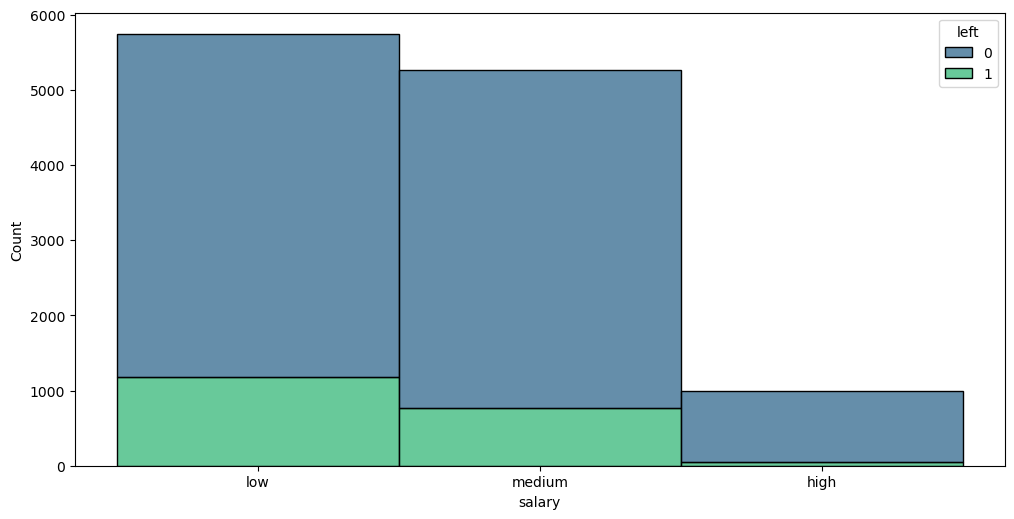

In [26]:
plt.figure(figsize = (12,6), dpi = 100)
sns.histplot(data = df1, x = 'salary', hue = 'left', bins = 45, multiple = 'stack', palette = 'viridis' )

In [ ]:
#as clearly seen, most employees leaving the company has salary_low followed by salary_medium. Very few employees 
#with salary_high has left

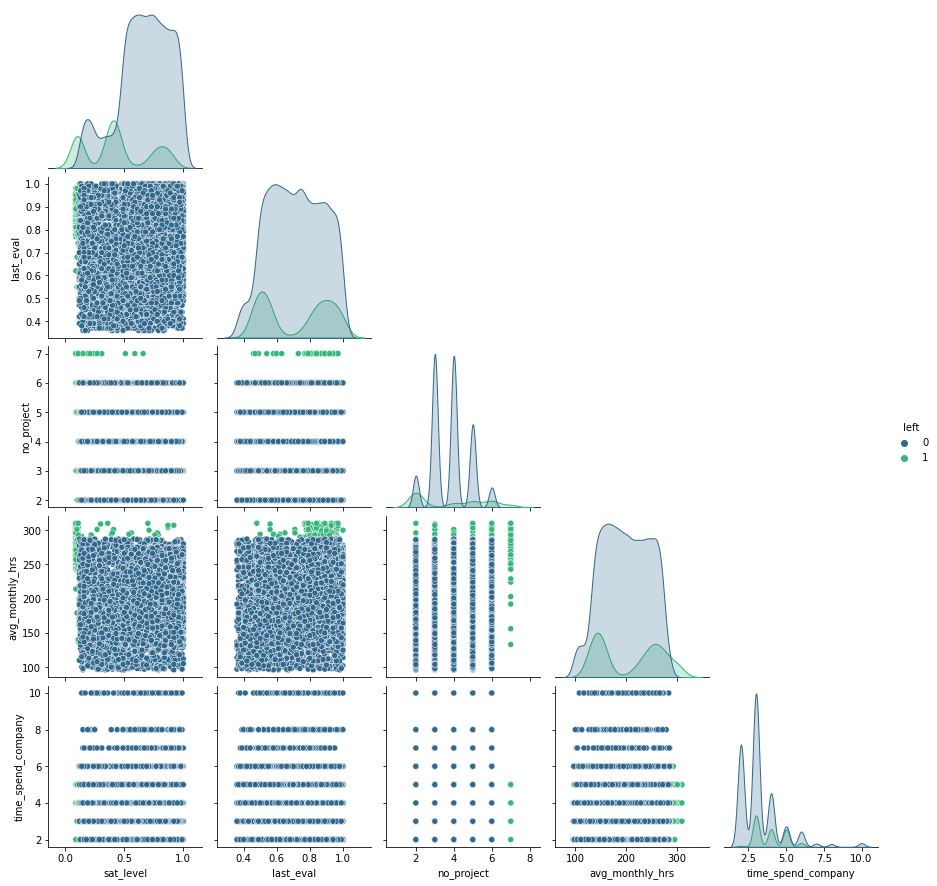

In [44]:

#lets plot pair plot b/w these imp variables
sns.pairplot(df1[['sat_level', 'last_eval', 'no_project', 'avg_monthly_hrs', 'time_spend_company', 'left']], corner = True, hue = 'left', palette = 'viridis')


In [45]:
#as clearly seen all these variables have a correlation with target variable left.

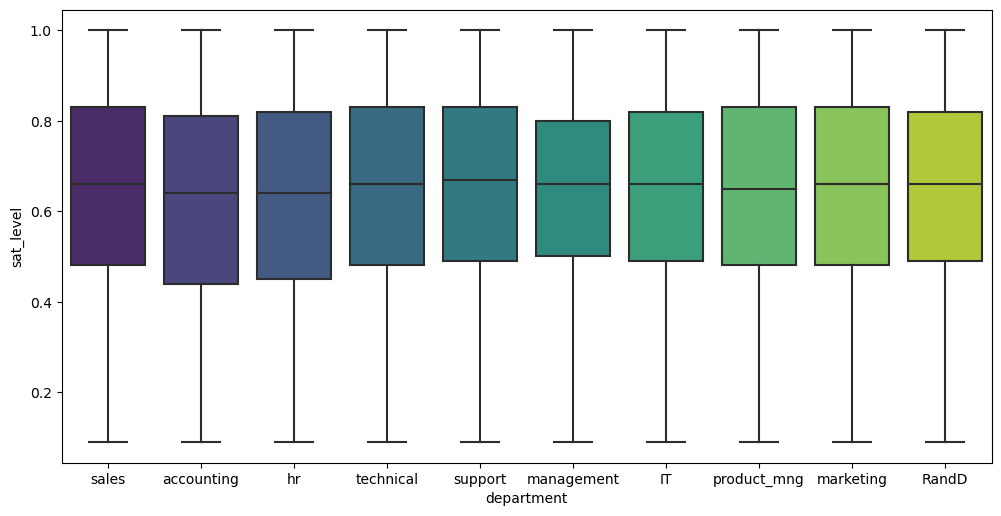

In [46]:
#lets check the sat_level for each department using boxplot
plt.figure(figsize = (12, 6), dpi = 100)
sns.boxplot(data = df1, x = 'department', y = 'sat_level', palette = 'viridis' )

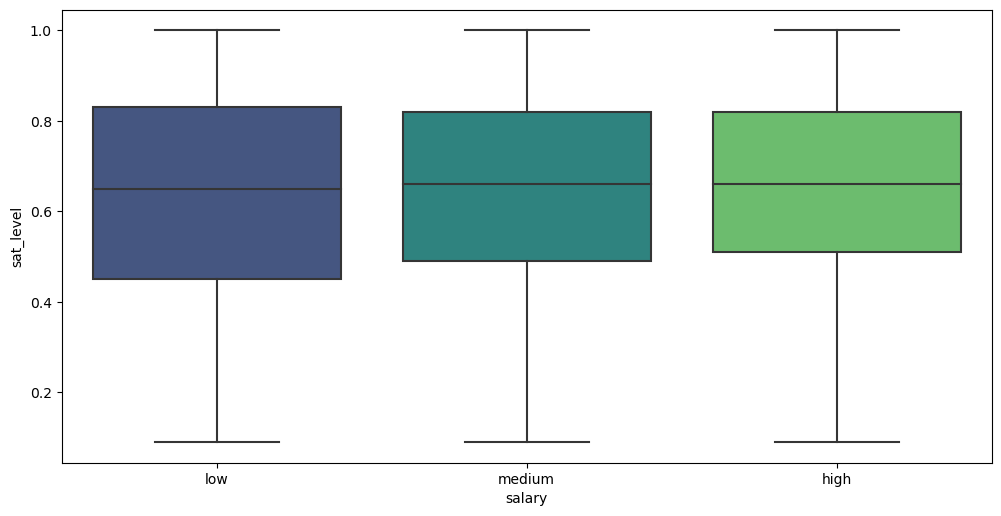

In [16]:
#lets check sat_level for each of salary category using boxplot
plt.figure(figsize = (12, 6), dpi = 100)
sns.boxplot(data = df1, x = 'salary', y = 'sat_level', palette = 'viridis')

In [48]:
#as seen  sat_level for low category is significantly lower than sat_level for high category.

In [17]:
#Lets do 1-way ANOVA testing to determine if there is any statistical significance b/w sat_level and department.
model = ols(formula = "sat_level ~ C(department)", data = df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sat_level   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8334
Date:                Sun, 11 Jun 2023   Prob (F-statistic):              0.585
Time:                        18:07:09   Log-Likelihood:                 48.971
No. Observations:               11991   AIC:                            -77.94
Df Residuals:                   11981   BIC:                            -4.024
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.6340      0.008     82.159      0.000       0.619       0.649
C(department)[T.RandD]          -0.0068      0.012     -0.571      0.568      -0.030       0.017
C(department)[T.accounting]     -0.0261      0.012     -2.107      0.035      -0.050      -0.002
C(department)[T.hr]             -0.0121      0.013     -0.966      0.334      -0.037       0.012
C(department)[T.management]     -0.0020      0.014     -0.146      0.884      -0.029       0.025
C(department)[T.marketing]       0.0008      0.012      0.062      0.950      -0.023       0.024
C(department)[T.product_mng]    -0.0042      0.012     -0.349      0.727      -0.028       0.019
C(department)[T.sales]          -0.0027      0.009     -0.303      0.762      -0.020       0.015
C(department)[T.support]         0.0008      0.010      0.084      0.933      -0.018       0.020
C(department)[T.technical]      -0.0061      0.009     -0.658      0.511      -0.024       0.012
==============================================================================
Omnibus:                      767.701   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              714.591
Skew:                          -0.538   Prob(JB):                    6.74e-156
Kurtosis:                       2.479   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#null hypothesis = no change in sat_level for various department
#aLternate = there is change in sat_levels
sm.stats.anova_lm(model, type = 2) 


,df,sum_sq,mean_sq,F,PR(>F)
C(department),9.0,0.435943,0.048438,0.833388,0.585175
Residual,11981.0,696.359855,0.058122,NaN,NaN


In [51]:
#since p val is greater than 0.05, we do not have statsical evidence
#to show that sat_levels are different for each department.,

In [19]:
model_1 = ols(formula = "left ~ C(department)", data = df1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   left   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.320
Date:                Sun, 11 Jun 2023   Prob (F-statistic):             0.0133
Time:                        18:07:15   Log-Likelihood:                -5150.4
No. Observations:               11991   AIC:                         1.032e+04
Df Residuals:                   11981   BIC:                         1.039e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.1619      0.012     13.597      0.000       0.139       0.185
C(department)[T.RandD]          -0.0394      0.018     -2.134      0.033      -0.076      -0.003
C(department)[T.accounting]      0.0136      0.019      0.714      0.475      -0.024       0.051
C(department)[T.hr]              0.0261      0.019      1.355      0.175      -0.012       0.064
C(department)[T.management]     -0.0426      0.021     -1.989      0.047      -0.085      -0.001
C(department)[T.marketing]       0.0045      0.019      0.243      0.808      -0.032       0.041
C(department)[T.product_mng]    -0.0015      0.019     -0.083      0.934      -0.038       0.035
C(department)[T.sales]           0.0079      0.014      0.583      0.560      -0.019       0.035
C(department)[T.support]         0.0094      0.015      0.640      0.522      -0.019       0.038
C(department)[T.technical]       0.0119      0.014      0.835      0.404      -0.016       0.040
==============================================================================
Omnibus:                     3414.354   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7141.171
Skew:                           1.790   Prob(JB):                         0.00
Kurtosis:                       4.216   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
#null hypothesis = no change in 'left' for various department
#aLternate = there is change in 'left'
sm.stats.anova_lm(model, type = 2) 


,df,sum_sq,mean_sq,F,PR(>F)
C(department),9.0,0.435943,0.048438,0.833388,0.585175
Residual,11981.0,696.359855,0.058122,NaN,NaN


In [ ]:
#Since the pval(here its 0.013267 ) is less than 0.05, we can reject the null hypthesis and confirm that there
#exists statistical evidence to prove that 'department' variable(independant) does have some impact/influence on 
#target variable('left')

### Insights

If the company could increase the sat_level of low_salary and medium_salary categories through programs,increments in salary,less working hours,no_employee retention could be achieved on a much better scale.

Points to be noted from EDA
1. time_spend_company has outliers
2. 10,000 employees have stayed with the company and 1991 employees have left the company after the omision of duplicates.
3. while time_spend_company, salary_low and avg_monthly_hrs have high positive correlation, sat_level and work_accident has high negative correlation.
4. through heatmap we found some positive correlation between monthly_hrs, last_eval and no_project
5. the distribution of time_spend_company is skewed to the right(mean=3.480773,med=3.0)
6. while the distribution of sat_level(mean=0.620868,med=0.65) and no_project is slightly skewed to the    left(mean=3.802778,med=4.0)
7. From countplot we observed that 
                (a) employees have left from all departments with sales being in top position followed by      technical though these departments have the highest employee count as well.
                (b) Employees from low_salary and medium_salary leave the company often, while high_salary category has high retention rate which is not surprising.
                (c) Those who were promoted(though in 100's)have not left while 20 - 30% of people not promoted left the company.
                (d) Employees with last_eval having median 0.8 of low and med_salary categories have left.
                (e) Employees with high salary and last_eval having median 0.55 have left the company.
                (f) Almost all employees leave as the 'time_spend_company' is in the range of (3 yrs to 6 yrs).
                (g) No employees with ('time_spend_company' > 6) has left the company.
                (h) Employees with 'no_project' = (3,4) has high retention rate . 
                (i) Employees with 'no_project' = (6,2,5) has low retention rate.
                (j) All employees with 'no_project' > 6 have left the company.
                (k) More employees have left than stayed with 'no_project' = 2
                (l) The no.of employees left is almost the same as that of stayed in the case of 'no_project'=6
8. From histogram we observed that 
                (a) Employees working at an avg monthly hrs of (120 - 150) have left the company.
                (b) Employees working at an avg monthly hrs of (215 - 325) have left the company.
                


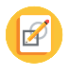
# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



4 things did catch my attention and can be considered as somewhat odd.
1. Employees from all departments have left the company. But through Hypothesis theorem it was found that 'department'(independant) variable does have an impact on target variable('left')
2. Employees with higher sat_level have left the company but interestingly employees with lower sat_level have stayed.
3. A very large number of employees are dissatisfied with 2 projects while a very large number of employees are satisfied with 3 or 4 projects.
4. A small number of Employees who are highly dissatisfied and having very low 'last_eval' score have stayed.

Since 'whether an employee has left' is categorical, Logistic Regression should be our first option. Then we can test with Bayes, Random Forest, XGB classifier, Decision tree
As required, the sample size is sufficiently large enough. But Logistic Regression requires no extreme outliers and hence now is the time to cleanse the 'time_spend_company' variable of its outliers. For this, the rows without outliers is saved to a new dataframe.

Logistic Regression does not require the variables to be completely independant of each other though there shouldnt exist a level of multicollinearity that hinders the performance of the variables which can be checked through heatmap from seaborn.
We will be testing their independancy through heatmap.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

categorical prediction, whether an employee leaves the company or not. (y/n)

Lets start with Logistic Regression. First we need to do one-hot encoding of the categorical independant variables (salary, department) and save it to a new dataframe. Then we need to remove the outliers and save the result in another dataframe.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [22]:
### YOUR CODE HERE ###


# One-hot encoding 
df_ohe = pd.get_dummies(df1, prefix=['salary', 'dept'], columns = ['salary', 'department'], drop_first=False)

# Display the new dataframe
df_ohe.head()

,sat_level,last_eval,no_project,avg_monthly_hrs,time_spend_company,work_accident,left,promotion_last_5years,salary_high,salary_low,...,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


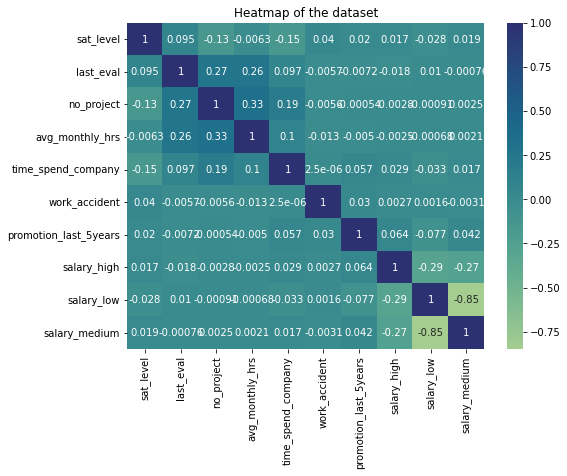

In [23]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_ohe[['sat_level', 'last_eval', 'no_project', 'avg_monthly_hrs', 'time_spend_company','work_accident', 'promotion_last_5years', 'salary_high',
                    'salary_low', 'salary_medium']].corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

In [54]:
#as clearly seen, independacy exists among all independant variables 
#there exists no multicollinearity that may hinder our model performance between variables 



In [24]:
# lets remove the outliers in 'time_spend_company'

df_2 = df_ohe[(df_ohe['time_spend_company'] >= low_limit) & (df_ohe['time_spend_company'] <= up_limit)]

# Display first few rows of new dataframe
df_2.head()

,sat_level,last_eval,no_project,avg_monthly_hrs,time_spend_company,work_accident,left,promotion_last_5years,salary_high,salary_low,...,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [25]:
# Define the target variable 'left'
y = df_2['left']

# Display first few rows of the outcome variable
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [26]:
#define X
# Select the features you want to use in your model
X = df_2[['sat_level', 'last_eval', 'no_project', 'avg_monthly_hrs', 'time_spend_company', 'work_accident', 'promotion_last_5years', 'salary_high', 'salary_low', 'salary_medium', 'dept_IT', 'dept_RandD',
         'dept_accounting', 'dept_hr', 'dept_management', 'dept_marketing', 'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical' ]]

# Display the first few rows of the selected features 
X.head()

,sat_level,last_eval,no_project,avg_monthly_hrs,time_spend_company,work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [27]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8933, 20), (2234, 20), (8933,), (2234,))

In [28]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)


In [29]:
# Construct a logistic regression model and fit it to the training dataset
log_reg = LogisticRegression(random_state=42, max_iter=500, class_weight = 'balanced').fit(X_train_scaled, y_train)

In [30]:
# now e need to test this model using predictions(y_pred)
y_pred = log_reg.predict(X_test_scaled)

In [31]:
log_reg.predict_proba(X_test_scaled)

array([[0.94761995, 0.05238005],
       [0.7067458 , 0.2932542 ],
       [0.33860529, 0.66139471],
       ...,
       [0.28290347, 0.71709653],
       [0.79237089, 0.20762911],
       [0.99179757, 0.00820243]])

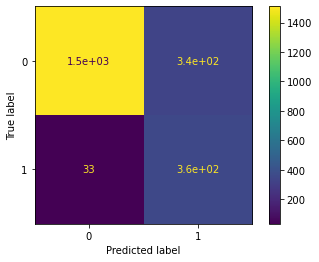

In [32]:
#now lets create a confusion matrix for the model we just created
#compute values
con_mat = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)

# Create display of confusion matrix
conmat_disp = ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=log_reg.classes_)

# Plot confusion matrix
conmat_disp.plot()

# Display plot
plt.show()

In [33]:
# Create classification report for logistic regression model
target_names = ['Employee would not leave prediction', 'Employee would leave prediction']
print(classification_report(y_test, y_pred, target_names=target_names))

                                     precision    recall  f1-score   support

Employee would not leave prediction       0.98      0.82      0.89      1846
    Employee would leave prediction       0.51      0.91      0.66       388

                           accuracy                           0.83      2234
                          macro avg       0.75      0.87      0.77      2234
                       weighted avg       0.90      0.83      0.85      2234



In [34]:
#Our model based on Logistic regression has high precision for 'staying' but very low precison on 'leaving' which is actually what we need
#thus our model based on Log Reg is not the solution.
dt = {'accuracy_score': accuracy_score(y_test, y_pred),'precision_score':precision_score(y_test, y_pred),
      'recall_score':recall_score(y_test, y_pred),'f1_score':f1_score(y_test, y_pred)}
dt_score = pd.DataFrame(data=dt,index=['Logistic Regression'])
dt_score

,accuracy_score,precision_score,recall_score,f1_score
Logistic Regression,0.834825,0.513748,0.914948,0.658017


In [35]:
#As seen, our model based on LogisticRegression has
# (a)Accuracy - 0.834825, (b) precision - 0.513748, (c) recall - 0.914948 and f1_score - 0.658017

#Lets next check the score of a model based on Random Forest Classifier
#but before that we can build a function to display the scores,confusion matrix.
def model_score(model, X_train, y_train, X_test, y_test):
    plot_confusion_matrix(model, X_test, y_test)
    plot_roc_curve(model, X_test, y_test)
    print("roc_auc_score = ", roc_auc_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    

roc_auc_score =  0.8664666428387933
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      1846
           1       0.51      0.91      0.66       388

    accuracy                           0.83      2234
   macro avg       0.75      0.87      0.77      2234
weighted avg       0.90      0.83      0.85      2234



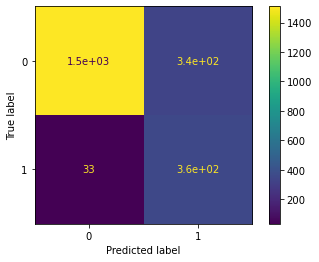

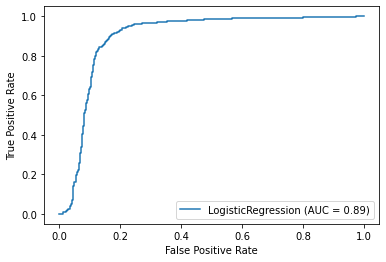

In [36]:
#lets test this function with Logistic Regression model
model_score(log_reg,X_train_scaled,y_train,X_test_scaled,y_test)

In [68]:
#success
#now lets do Random Forest Classifier model.
rand_fc = RandomForestClassifier(class_weight='balanced')
# tuning the hyperparameters using gridsearchCV or
#set up cross-validated grid-search to exhuastively search for the best model parameters.
params = {'n_estimators':[50,70,100,120,150], 'criterion':['gini','entropy'],
          'max_depth':[5,7,9,None], 'max_features' : ["auto", "sqrt", "log2"]}
# running cross validation with cv = 5
grdsrc_cv = GridSearchCV(rand_fc, param_grid = params, cv=5)

In [69]:
%%time
grdsrc_cv.fit(X_train_scaled,y_train)

CPU times: user 3min 41s, sys: 627 ms, total: 3min 42s
Wall time: 3min 42s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [70]:
#now lets search for the best parameters
grdsrc_cv.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'n_estimators': 100}

In [71]:
#now lets modify our model according to the best params
rand_fc1 = RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=None, max_features='log2', 
                                  class_weight='balanced')


In [72]:
#lets fit our new model into the training data set
rand_fc1.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

roc_auc_score =  0.9553073795668539
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1846
           1       0.98      0.91      0.95       388

    accuracy                           0.98      2234
   macro avg       0.98      0.96      0.97      2234
weighted avg       0.98      0.98      0.98      2234



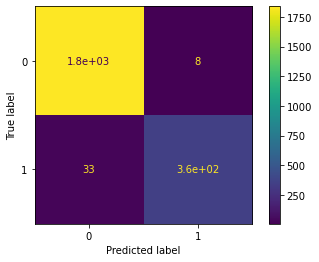

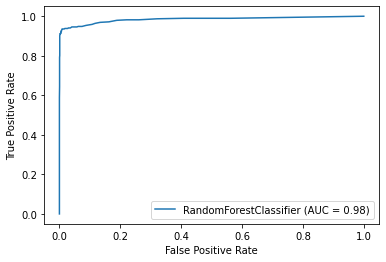

In [73]:
#lets predict and evaluate the model.
y_pred = rand_fc1.predict(X_test_scaled)
model_score(rand_fc1, X_train_scaled, y_train, X_test_scaled, y_test)

In [74]:
#We have come a long way. Our new model has a precision of 0.98 which is excellent. 
#Therefore Random Forest Classifier works best in this case. In any case, it is far better than Logistic Regression.

In [75]:
dt1 = {'accuracy_score': accuracy_score(y_test, y_pred),'precision_score':precision_score(y_test, y_pred),
      'recall_score':recall_score(y_test, y_pred),'f1_score':f1_score(y_test, y_pred)}
dt1_score = pd.DataFrame(data=dt1,index=['Random Forest Classifier'])
dt1_score

,accuracy_score,precision_score,recall_score,f1_score
Random Forest Classifier,0.981647,0.977961,0.914948,0.945406


In [76]:
#Our model based on RandomForestClassifier() has
# (a) Accuracy = 0.982543, (b) Precision = 0.978082, (c) Recall = 0.920103 and (d) F1_SCORE = 0.948207
#So far RandomForestClassifier has been the best one.
#Lets check Naive Bayes Classifier model next.

In [77]:
na_ba = GaussianNB()
na_ba.fit(X_train_scaled, y_train) #fit naive_bayes(GaussianNB) into training dataset.

GaussianNB(priors=None, var_smoothing=1e-09)

roc_auc_score =  0.9553073795668539
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1846
           1       0.98      0.91      0.95       388

    accuracy                           0.98      2234
   macro avg       0.98      0.96      0.97      2234
weighted avg       0.98      0.98      0.98      2234



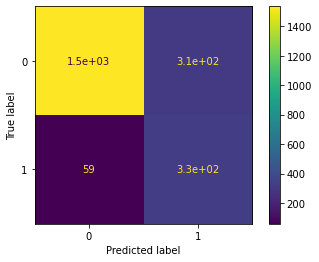

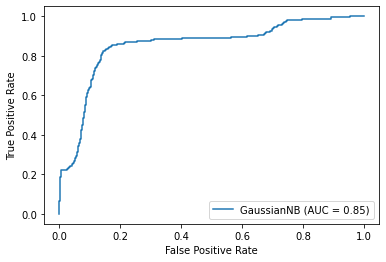

In [78]:
#lets predict and evaluate
na_ba.predict(X_test_scaled)
model_score(na_ba, X_train_scaled, y_train, X_test_scaled, y_test)

In [79]:
# As clearly seen, Naive-Bayes Classifier is better than Random Forest Classifier as it
#has better recall and f1 score.
dt2 = {'accuracy_score': accuracy_score(y_test, y_pred), 'precision_score':precision_score(y_test, y_pred),
      'recall_score':recall_score(y_test, y_pred), 'f1_score':f1_score(y_test, y_pred)}
dt2_score = pd.DataFrame(data = dt2,index = ['Naive-Bayes Classifier'])
dt2_score

,accuracy_score,precision_score,recall_score,f1_score
Naive-Bayes Classifier,0.981647,0.977961,0.914948,0.945406


In [80]:
#Thus the only difference between RandomForestClassifier() and GAUSSIANNB() in our case is Roc_curve
#in other words both models deliver the same result more or less.
#Now lets check XGBCLASSIFIER()

In [81]:
#XGB CLassifier
xgb = XGBClassifier(objective = 'binary:logistic', random_state = 0)

In [82]:
params = {'max_depth' : [5, 6, 7, 8, None], 'min_child_weight' : [1, 2, 3, 4, 5], 'learning_rate' : [0.1, 0.2, 0.3],
          'n_estimators' : [75, 100, 125]}


In [83]:
## now we can start tuning the hyperparameters using gridsearchCV or
#set up cross-validated grid-search to exhuastively search for the best model parameters.
grd_cv = GridSearchCV(xgb, param_grid = params, cv=5, refit = 'f1')


In [84]:
%%time
grd_cv.fit(X_train_scaled,y_train)

CPU times: user 25min 45s, sys: 7.9 s, total: 25min 53s
Wall time: 12min 59s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=0,
                   

In [85]:
#now lets search for the best parameters
grd_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 75}

In [86]:
grd_cv.best_score_

0.9846637811593123

In [87]:
#now lets modify our model with the best_params
xgb_1 = XGBClassifier(objective = 'binary:logistic', random_state = 0, max_depth = 6, min_child_weight = 1,
                      learning_rate = 0.1, n_estimators = 75)

In [88]:
#now lets fit our model into our training data
xgb_1.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=75, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [89]:
#lets predict and evaluate
y_pred = xgb_1.predict(X_test_scaled)

roc_auc_score =  0.9620215344405849
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1846
           1       0.98      0.93      0.95       388

    accuracy                           0.98      2234
   macro avg       0.98      0.96      0.97      2234
weighted avg       0.98      0.98      0.98      2234



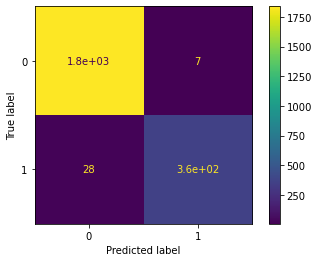

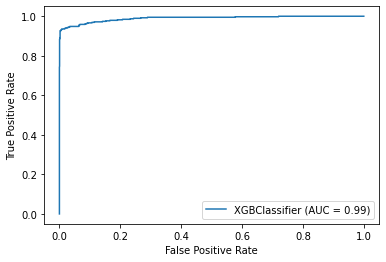

In [90]:
model_score(xgb_1, X_train_scaled, y_train, X_test_scaled, y_test)

In [91]:
#as seen clearly precision and recall has fared better in XGB classifier.
#roc_auc_score has increased. For RandomForest and Naive-Bayes, the roc_auc_score =  0.9565960393606683, 
#For XGBClassifier roc_auc_score =  0.9620215344405849
dt3 = {'accuracy_score': accuracy_score(y_test, y_pred), 'precision_score':precision_score(y_test, y_pred),
      'recall_score':recall_score(y_test, y_pred), 'f1_score':f1_score(y_test, y_pred)}
dt3_score = pd.DataFrame(data = dt3,index = ['XGB Classifier'])
dt3_score

,accuracy_score,precision_score,recall_score,f1_score
XGB Classifier,0.984333,0.980926,0.927835,0.953642


In [92]:
#Thus as clearly seen from the table above, XGB Classifier has a better score in all metrics. It's
#(a) Accuracy = 0.984333, (b) Precision = 0.980926, (c) recall = 0.927835 and (d) F1_Score = 0.953642.
#Thus XGB Classifier has been the best option so far.
#Lets do DecisionTreeClassifier() and this will be our last model.

In [93]:
#DecisionTreeClassifier()
dec_tree = DecisionTreeClassifier(random_state=0)
params = {'max_depth':[4, 6, 8, None],
'min_samples_leaf': [2, 5, 1],
'min_samples_split': [2, 4, 6]
}
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
## now we can start tuning the hyperparameters using gridsearchCV or
#set up cross-validated grid-search to exhuastively search for the best model parameters.
grd_cv = GridSearchCV(dec_tree, param_grid = params, scoring=scoring, cv=5, refit='roc_auc')

In [94]:
%%time
grd_cv.fit(X_train_scaled, y_train)



CPU times: user 3.37 s, sys: 41 µs, total: 3.37 s
Wall time: 3.37 s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [95]:
#now lets search for the best parameters
grd_cv.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [96]:
grd_cv.best_score_

0.9731178364814795

In [97]:
#now lets modify our model with the best_params
dec_tree1 = DecisionTreeClassifier(random_state = 0, max_depth = 4, min_samples_leaf = 5,
                      min_samples_split = 2)

In [98]:
#now lets fit our model into our training data
dec_tree1.fit(X_train_scaled, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [99]:
#lets predict and evaluate
y_pred = dec_tree1.predict(X_test_scaled)

roc_auc_score =  0.9595838312986564
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1846
           1       0.96      0.93      0.94       388

    accuracy                           0.98      2234
   macro avg       0.97      0.96      0.97      2234
weighted avg       0.98      0.98      0.98      2234



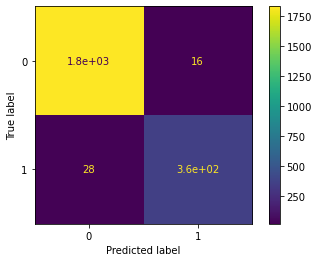

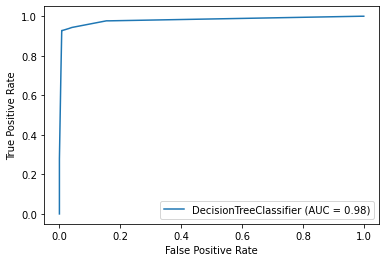

In [100]:
model_score(dec_tree1, X_train_scaled, y_train, X_test_scaled, y_test)

In [101]:
#As clearly seen above, even though DecisionTreeClassifier() has good metrics, XGBClassifier(),
#RandomForestClassifier() and GaussianNB() has better metrics.
dt4 = {'accuracy_score': accuracy_score(y_test, y_pred), 'precision_score':precision_score(y_test, y_pred),
      'recall_score':recall_score(y_test, y_pred), 'f1_score':f1_score(y_test, y_pred)}
dt4_score = pd.DataFrame(data = dt4,index = ['Decision Tree Classifier'])
dt4_score


,accuracy_score,precision_score,recall_score,f1_score
Decision Tree Classifier,0.980304,0.957447,0.927835,0.942408


In [102]:
#As seen from the table above, the recall_score of Decision Tree Classifier is the best of all models, though
#same as XGB Classifier
#now lets compare the metrics of all our models
df_final_results = pd.concat([dt_score, dt1_score, dt2_score, dt3_score, dt4_score])
df_final_results

,accuracy_score,precision_score,recall_score,f1_score
Logistic Regression,0.834825,0.513748,0.914948,0.658017
Random Forest Classifier,0.981647,0.977961,0.914948,0.945406
Naive-Bayes Classifier,0.981647,0.977961,0.914948,0.945406
XGB Classifier,0.984333,0.980926,0.927835,0.953642
Decision Tree Classifier,0.980304,0.957447,0.927835,0.942408


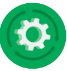
# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- What business recommendations do you propose based on the models built?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



The key insights
1. Out of the total 10 independant variables "sat_level,last_eval,no_project,avg_monthly_hrs,time_spend_company,
   work_accident,left,promotion_last_5years,department,salary" the independant variables selected for the model      were the best among the 10 as we achieved very good metrics with XGBClassifier(), RandomForestClasifier() and      GaussianNB().
2. Lets analyze the independant variables seperately and understand its influence on target variable 'left'.
  
  (1) sat_level : 
  It has been seen that sat_level has the highest negative correlation with 'left' which is quite reasonable but oddly employees with higher sat_levels have left the company and employees with lower sat_levels have stayed. But that doesnt mean that they will continue staying. When we looked further we found that sat_level has high negative correlation with 'time_spend_company' and 'no_project' and high positive correlation with 'last_eval'.
  We also found that  a very small portion of employees are dissatisfied at (2,3) years and a very large number of employees are dissatisfied at(4,5,6) years. Also  a very large number of employees are dissatisfied with 2 projects. While a very large number is satisfied with (3,4) projects. Employees with last_eval < 0.5 are dissatisfied and  interestingly a small number of employees with low 'sat_level' and low 'last_eval' have stayed.
  
  (2) last_eval :
  As clearly seen before 'last_eval' has high positive correlation with 'no_project', 'avg_monthly_hrs' and medium positive correlation with 'time_spend_company' and 'sat_level'. All employees with 2 projects have scored poorly in last_eval as did most employees with 6 projects.
  
  (3) no_project :
  Employees with 'no_project' = (3,4) has high retention rate and employees with 'no_project' = (6,2,5) has least employee retention, also all employees with no_project > 6 have left the company.
  
  (4) avg_monthly_hrs :
  Employees working at an avg monthly hrs of (120 - 150) have left and those working at an avg of 215 to 325 have also left the company. Interestingly employees working for 2 projects have higher avg_monthly_hrs than those working 3,4 or 5 projects.
  
  (5) time_spend_company :
  All employees leave as the time_spend_company is in the range of (3 yrs to 6 yrs). 'sat_level' decreases with increase in 'time_spend_company'
  
  (6) work_accident :
  1850 employees met with accident, only few leave the company.
  
  (7) promotion_last_5years :
  Employees who were promoted(though in 100's) have not left while 20 - 30% of people not promoted left the company.
  
  (8) salary :
  Employees with last_eval with median 0.8 of low and med_salary categories have left. Also employees with high salary and last_eval with median 0.55 have left the company. Most employees leaving the company has salary_low followed by salary_medium. Very few employees with salary_high has left indicating the importance of salary variable.
  
  (9) department : 
  Sales, Technical and Support have the highest employee count and 'left' count. Only sales, technical and support have good sat_level. 
  
  
  
  

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




A total of 5 models were tested on the dataset. 
1. Logistic Regression
 (a) Accuracy = 0.834825, (b) Precision = 0.513748, (c) Recall = 0.914948, (d) F-1 Score = 0.658017,
 (e) roc_auc_score = 0.8664666428387933 
One good thing about Logistic Regression in this case is that it doies have good Recall which is really important in this scenario as it highlight the correctly predicted 'leaving' employees. But its low precision and F-1 Score makes it a bad choice here.
2. Random Forest Classifier
 (a) Accuracy = 0.981647, (b) Precision = 0.977961, (c) Recall = 0.914948 , (d) F-1 Score = 0.945406,
 (e) roc_auc_score = 0.9553073795668539
Though it has high accuracy, precision and F-1 Score, its recall is only as good as LogistcRegression()
3. Naive-Bayes Classifier(GaussianNB)
 (a) Accuracy = 0.981647, (b) Precision = 0.977961, (c) Recall = 0.914948 , (d) F-1 Score = 0.945406,
 (e) roc_auc_score =  0.9553073795668539
It can be clearly seen that both RandomForestClassifier() and GaussianNB() have the exact same metrics in this case. The only difference between them is in the ROC curve. RandomForestClassifier has the better ROC curve.
4. XGB Classifier
 (a) Accuracy = 0.984333, (b) Precision = 0.980926, (c) Recall = 0.927835, (d) F-1 Score = 0.953642,
 (e) roc_auc_score =  0.9620215344405849
It can be clearly seen that XGB classifier has the best metrics including the 'roc_auc_score'. XGBClassifier is the best option in this case.
5. Decision Tree Classsifier
 (a) Accuracy = 0.980304, (b) Precision = 0.957447, (c) Recall = 0.927835, (d) F-1 Score = 0.942408,
 (e) roc_auc_score =  0.9595838312986564
Decision Tree Classifier has the best recall score alongside XGB Classifier. Since precision and recall are the most important metrices here as we are dealing with 'whether an employee leaves or not', XGB Classifier is the best model suited for this case. 
  

Conclusion :
With XGBClassifier() based model we obtained a precision score of 0.98 and recall score of 0.92. Thus whether an employee 'leaves' could be predicted with a precision of 0.98 with our model.
Recommendations :
1. Since it has been found that employees working for (3,4) projects have better 'sat_level' and better 'last_eval' than employees working for 2 projects, the manager of that group (with 2 projects) should introspect and look at the managerial stability achieved by other manager (3,4) and look for the missing spark in his team. If the employees working for (3,4) projects are happier, scores better last_eval scores than those working for 2 projects then there is a serious issue that needs to be solved within the group. Also it has been found that employees working for 2 projects have higher 'avg_monthly_hrs' than those working for (3,4,5) projects. Hence this 'avg_monthly_hrs' needs to be reduced for employees working 2 projects.
2. Employees seem to be having a decrease in 'sat_level' as the 'time_spend_company' increases indicating the lack of enthusiasm among senior employees. This could be directly related to other variable 'promotion_last_5years'. Employees do feel that they need to be promoted. 
3. Employees working overtime are not appreciated enough as large section of employees working for 215 to 325 'avg_monthly_hrs' have left.
4. Also it has been found that a large section of employees working less 'avg_monthly_hrs' have left and therefore those employees working less need to be inspired to work hard for rewards and could ensure their stay.

Yes i totally think that my models based on XGBClassifier(), RandomForestClassifier() and DecisionTreeClassifier() could be improved with feature engineering. We could find the variables of utmost imporance usuing their Gini Index or Information Gain(IG) and then modify our model based on our findings on the 'best split'.
